# Digital Narratives of Covid-19 through Twitter Mining (MARLAS Journal)

In [1]:
import numpy as np
import pandas as pd
from coveet import count_ngrams, uniq_vocab_by_group
from collections import Counter
from pprint import pprint
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

## I. Tweet queries from April 25, 2020 to May 25, 2020:

In [2]:
!python3 coveet.py query -g ar co ec mx pe -l es -d 2020-04-25 2020-05-25 # do not run it twice!

Namespace(all=False, date=[datetime.datetime(2020, 4, 25, 0, 0), datetime.datetime(2020, 5, 25, 0, 0)], func=<function handle_query at 0x7fe835421550>, geo=['ar', 'co', 'ec', 'mx', 'pe'], lang=['es'], search=None)
^C
Traceback (most recent call last):
  File "coveet.py", line 373, in <module>
    args.func(args)
  File "coveet.py", line 108, in handle_query
    df = get_data_df(args.lang, args.geo, start_date, end_date)
  File "coveet.py", line 50, in get_data_df
    tweets = requests.get(query_url(l, g, date), stream=True).text
  File "/home/jbonnell/.pyenv/versions/3.8.3/lib/python3.8/site-packages/requests/models.py", line 858, in text
    encoding = self.apparent_encoding
  File "/home/jbonnell/.pyenv/versions/3.8.3/lib/python3.8/site-packages/requests/models.py", line 728, in apparent_encoding
    return chardet.detect(self.content)['encoding']
  File "/home/jbonnell/.pyenv/versions/3.8.3/lib/python3.8/site-packages/chardet/__init__.py", line 38, in detect
    detector.feed(byte_s

In [2]:
df = pd.read_csv('dhcovid_2020-4-25_2020-5-25_es_ar_co_ec_mx_pe.csv', index_col=0)

Tidy file by removing stopwords:

In [116]:
!python3 coveet.py tidy -file dhcovid_2020-4-25_2020-5-25_es_ar_co_ec_mx_pe.csv -stopwords ../stopwords/stopwords_es.txt ../stopwords/stopwords_hashtags.txt

Namespace(file='dhcovid_2020-4-25_2020-5-25_es_ar_co_ec_mx_pe.csv', func=<function handle_tidy at 0x7ff1bfda9670>, lemmatize=False, search=None, stopwords=['../stopwords/stopwords_es.txt', '../stopwords/stopwords_hashtags.txt'])
wrote tidied df to dhcovid_2020-4-25_2020-5-25_es_ar_co_ec_mx_pe_stopworded.csv 🎉


In [117]:
df = pd.read_csv('dhcovid_2020-4-25_2020-5-25_es_ar_co_ec_mx_pe_stopworded.csv', index_col=0) # run from here using this file

In [118]:
df['date'] = pd.to_datetime(df['date'])
df['text'] = df['text'].str.split()
df['hashtags'] = df['hashtags'].str.split()

### Top 30 words:

In [119]:
top_n = 30  # top 30 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'text'  # set to either 'text' or 'hashtags'
df_text = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df_text.groupby(["geo", "lang"])[col_name]}

In [120]:
pprint(counts)

{('ar', 'es'): [(('casos',), 8233),
                (('coronavirus',), 4061),
                (('pandemia',), 4022),
                (('hoy',), 3567),
                (('nuevos',), 3459),
                (('salud',), 2941),
                (('argentina',), 2815),
                (('pais',), 2765),
                (('personas',), 2643),
                (('cuarentena',), 2532),
                (('positivos',), 2263),
                (('situacion',), 2201),
                (('caso',), 2002),
                (('covid',), 1825),
                (('muertes',), 1784),
                (('gente',), 1730),
                (('nuevo',), 1726),
                (('mundo',), 1724),
                (('gobierno',), 1699),
                (('test',), 1629),
                (('provincia',), 1574),
                (('positivo',), 1567),
                (('pacientes',), 1526),
                (('mayo',), 1479),
                (('años',), 1477),
                (('virus',), 1436),
                (('confir

In [121]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size

In [122]:
def plot_bar_matrix(counts, num_top_words, num_cols=2):
    """
    function for plotting a matrix of bar plots 
    
    counts: a dictionary mapping from a geo-lang pair identifier (generalizable to any identifier)
            to a list of (word, count) tuples containing the top word frequencies
    num_cols: desired number of columns to show in the grid
    str_func: function for "pretty printing" the title used in each of the bar charts  
    """
    # automatically determine the grid to use based on desired number of columns 
    num_rows = len(counts.keys()) // num_cols
    num_rows += 1 if num_rows * num_cols < len(counts.keys()) else 0
    fig, axes = plt.subplots(num_rows, num_cols)
    flattened = axes.flatten()
    for i, (id_pair, counts) in enumerate(counts.items()):
        labels = [" ".join(w) for w, _ in counts]
        y = [n for _, n in counts]
        cmap = plt.get_cmap('spring')
        colors = plt.get_cmap('spring')(np.linspace(0, 1, len(labels)))
        flattened[i].set_title(f"{' '.join([str(p) for p in id_pair])}")
        flattened[i].barh(y=range(0, num_top_words), width=y, color=colors, tick_label=labels) # range should equal to the # of top words you want to retrieve.
        flattened[i].invert_yaxis()  # reverse the visualization order along the y-axis

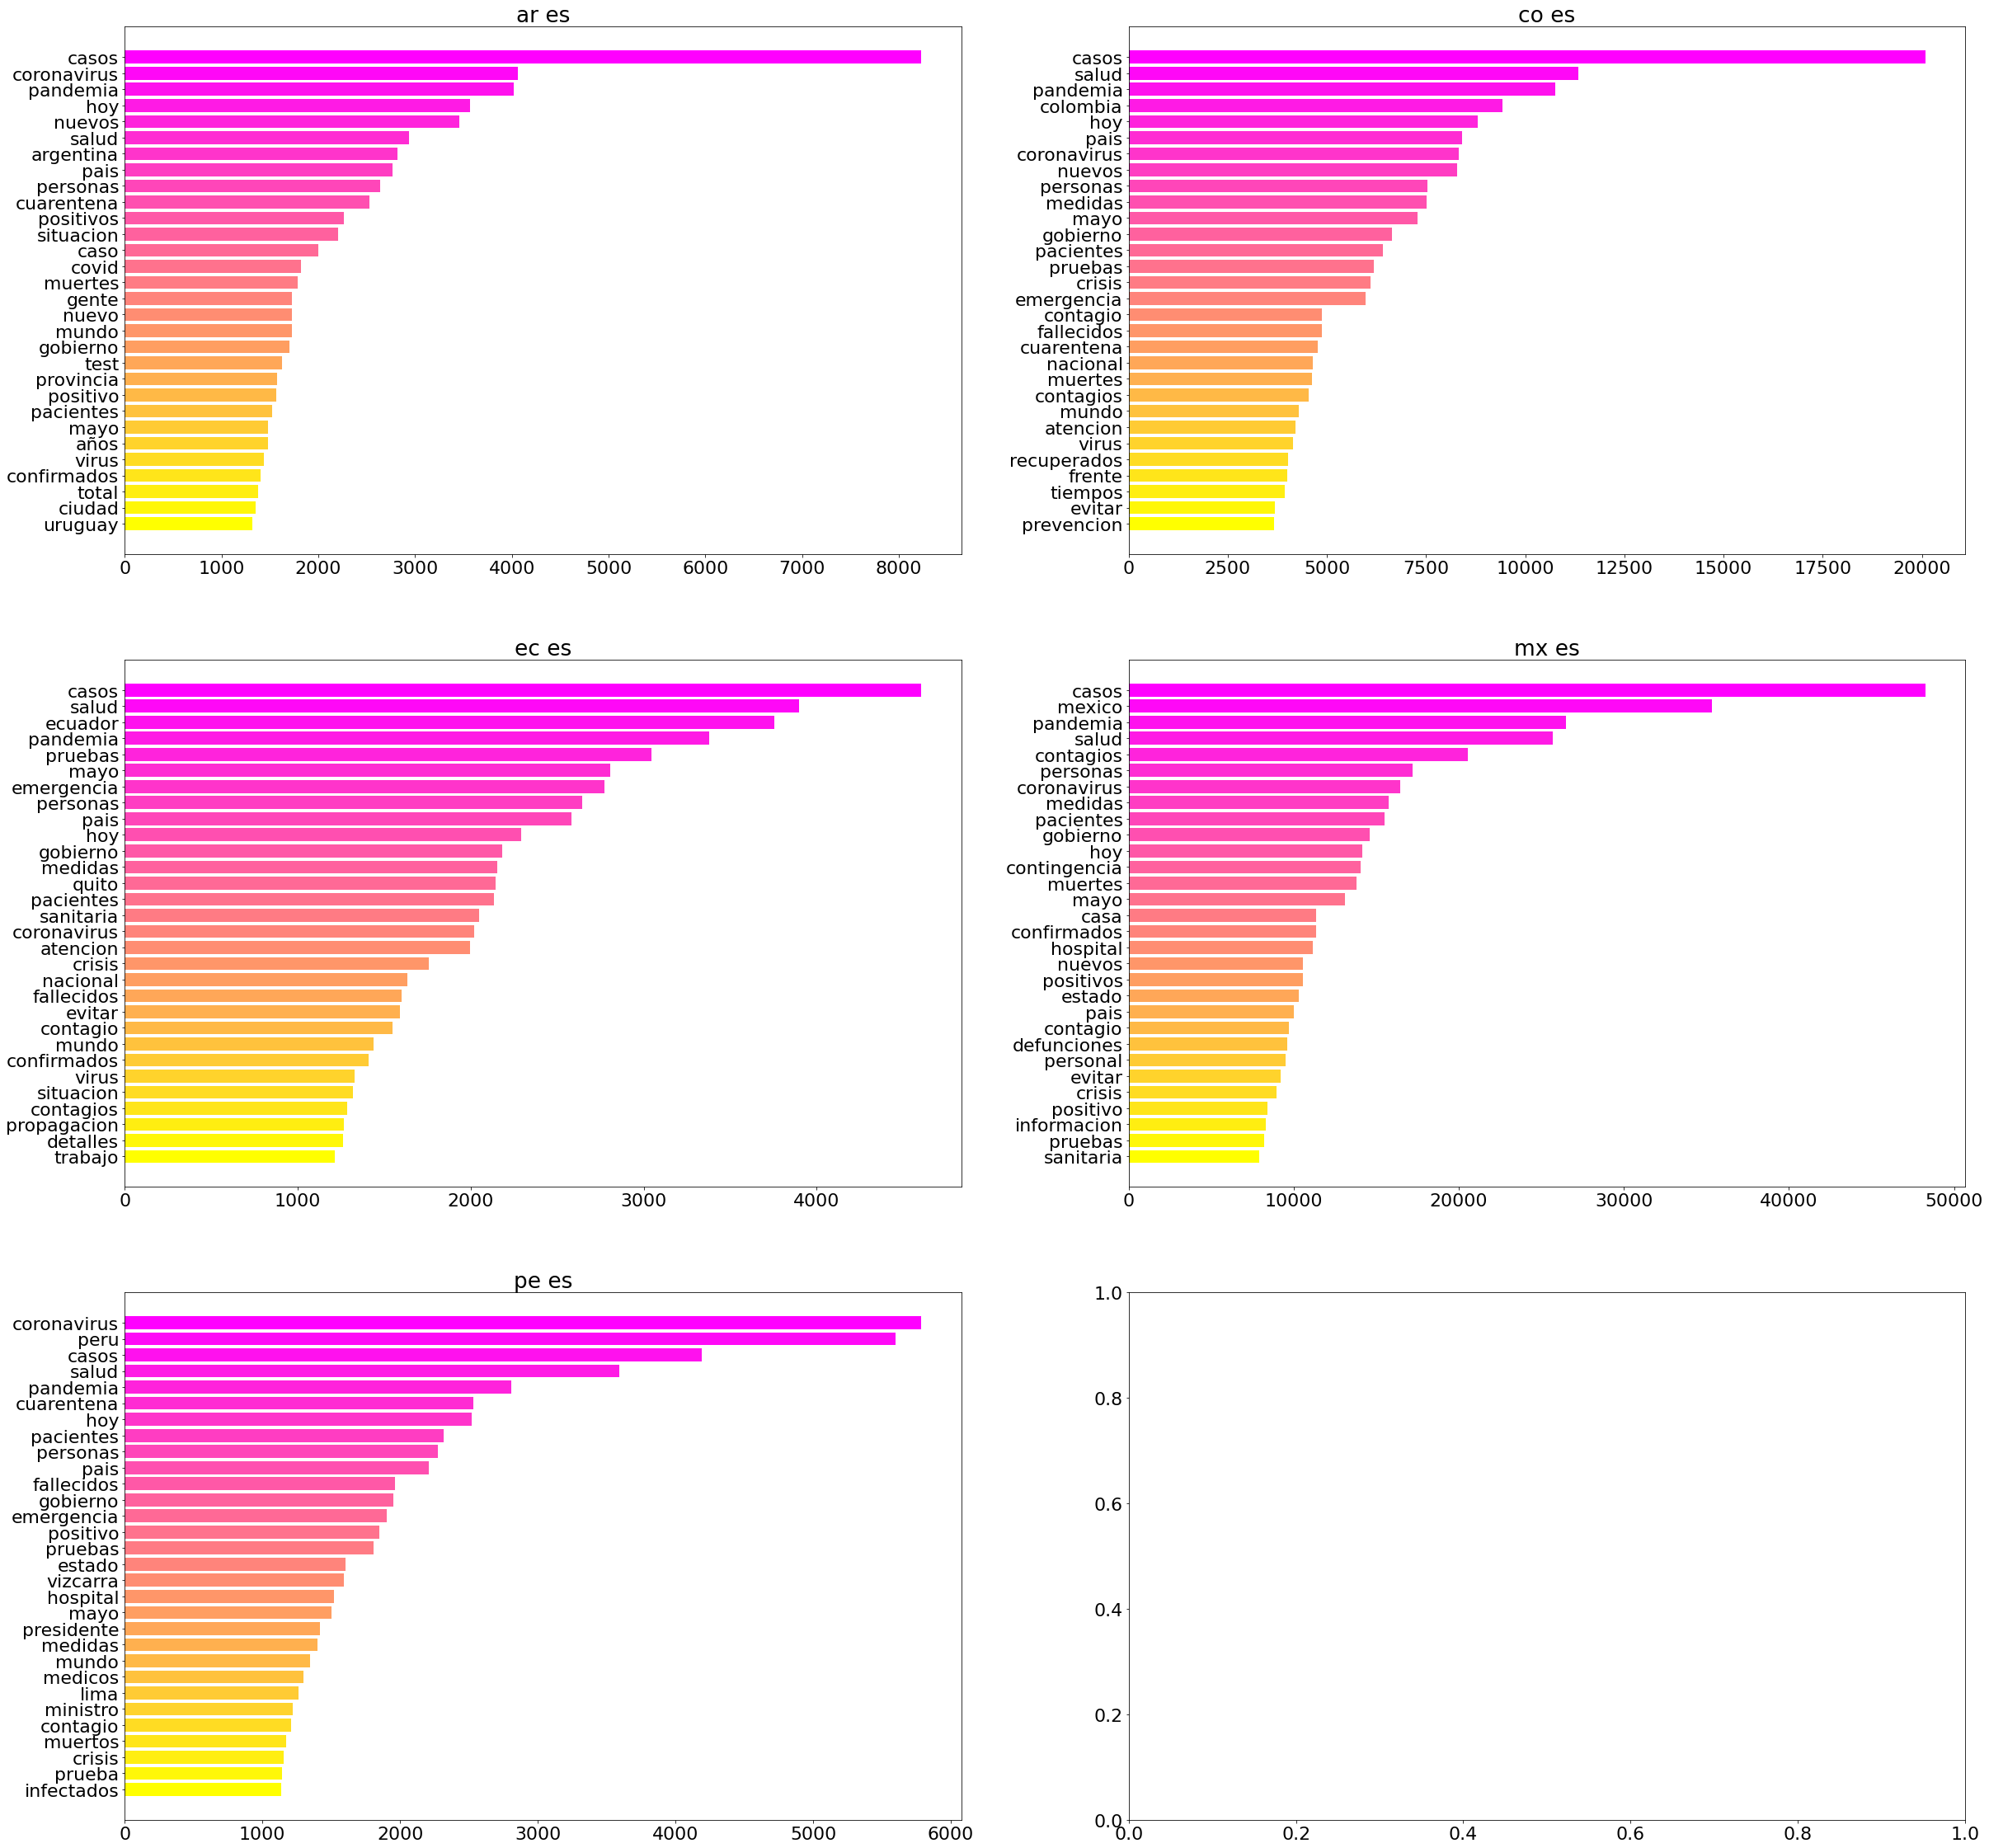

In [78]:
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2)

### Top 30 hashtags from April 25th yo May 25th

In [123]:
top_n = 30  # top 30 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'hashtags'  # set to either 'text' or 'hashtags'
df_text = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df_text.groupby(["geo", "lang"])[col_name]}

In [124]:
pprint(counts)

{('ar', 'es'): [(('#quedateencasa',), 1193),
                (('#cuarentena',), 837),
                (('#argentina',), 595),
                (('#coronavirusargentina',), 515),
                (('#pandemia',), 486),
                (('#ahora',), 406),
                (('#yomequedoencasa',), 317),
                (('#argentinaunida',), 292),
                (('#noscuidamosentretodos',), 287),
                (('#quedateentucasa',), 266),
                (('#laplata',), 259),
                (('#afp',), 257),
                (('#cuidarteescuidarnos',), 253),
                (('#salud',), 206),
                (('#coronavirusenargentina',), 192),
                (('#ahoramontevideo',), 183),
                (('#covid19uruguay',), 174),
                (('#cordoba',), 170),
                (('#covid19argentina',), 170),
                (('#noticias',), 167),
                (('#uruguay',), 164),
                (('#uruguaydecide',), 161),
                (('#rosario',), 160),
             

In [125]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size

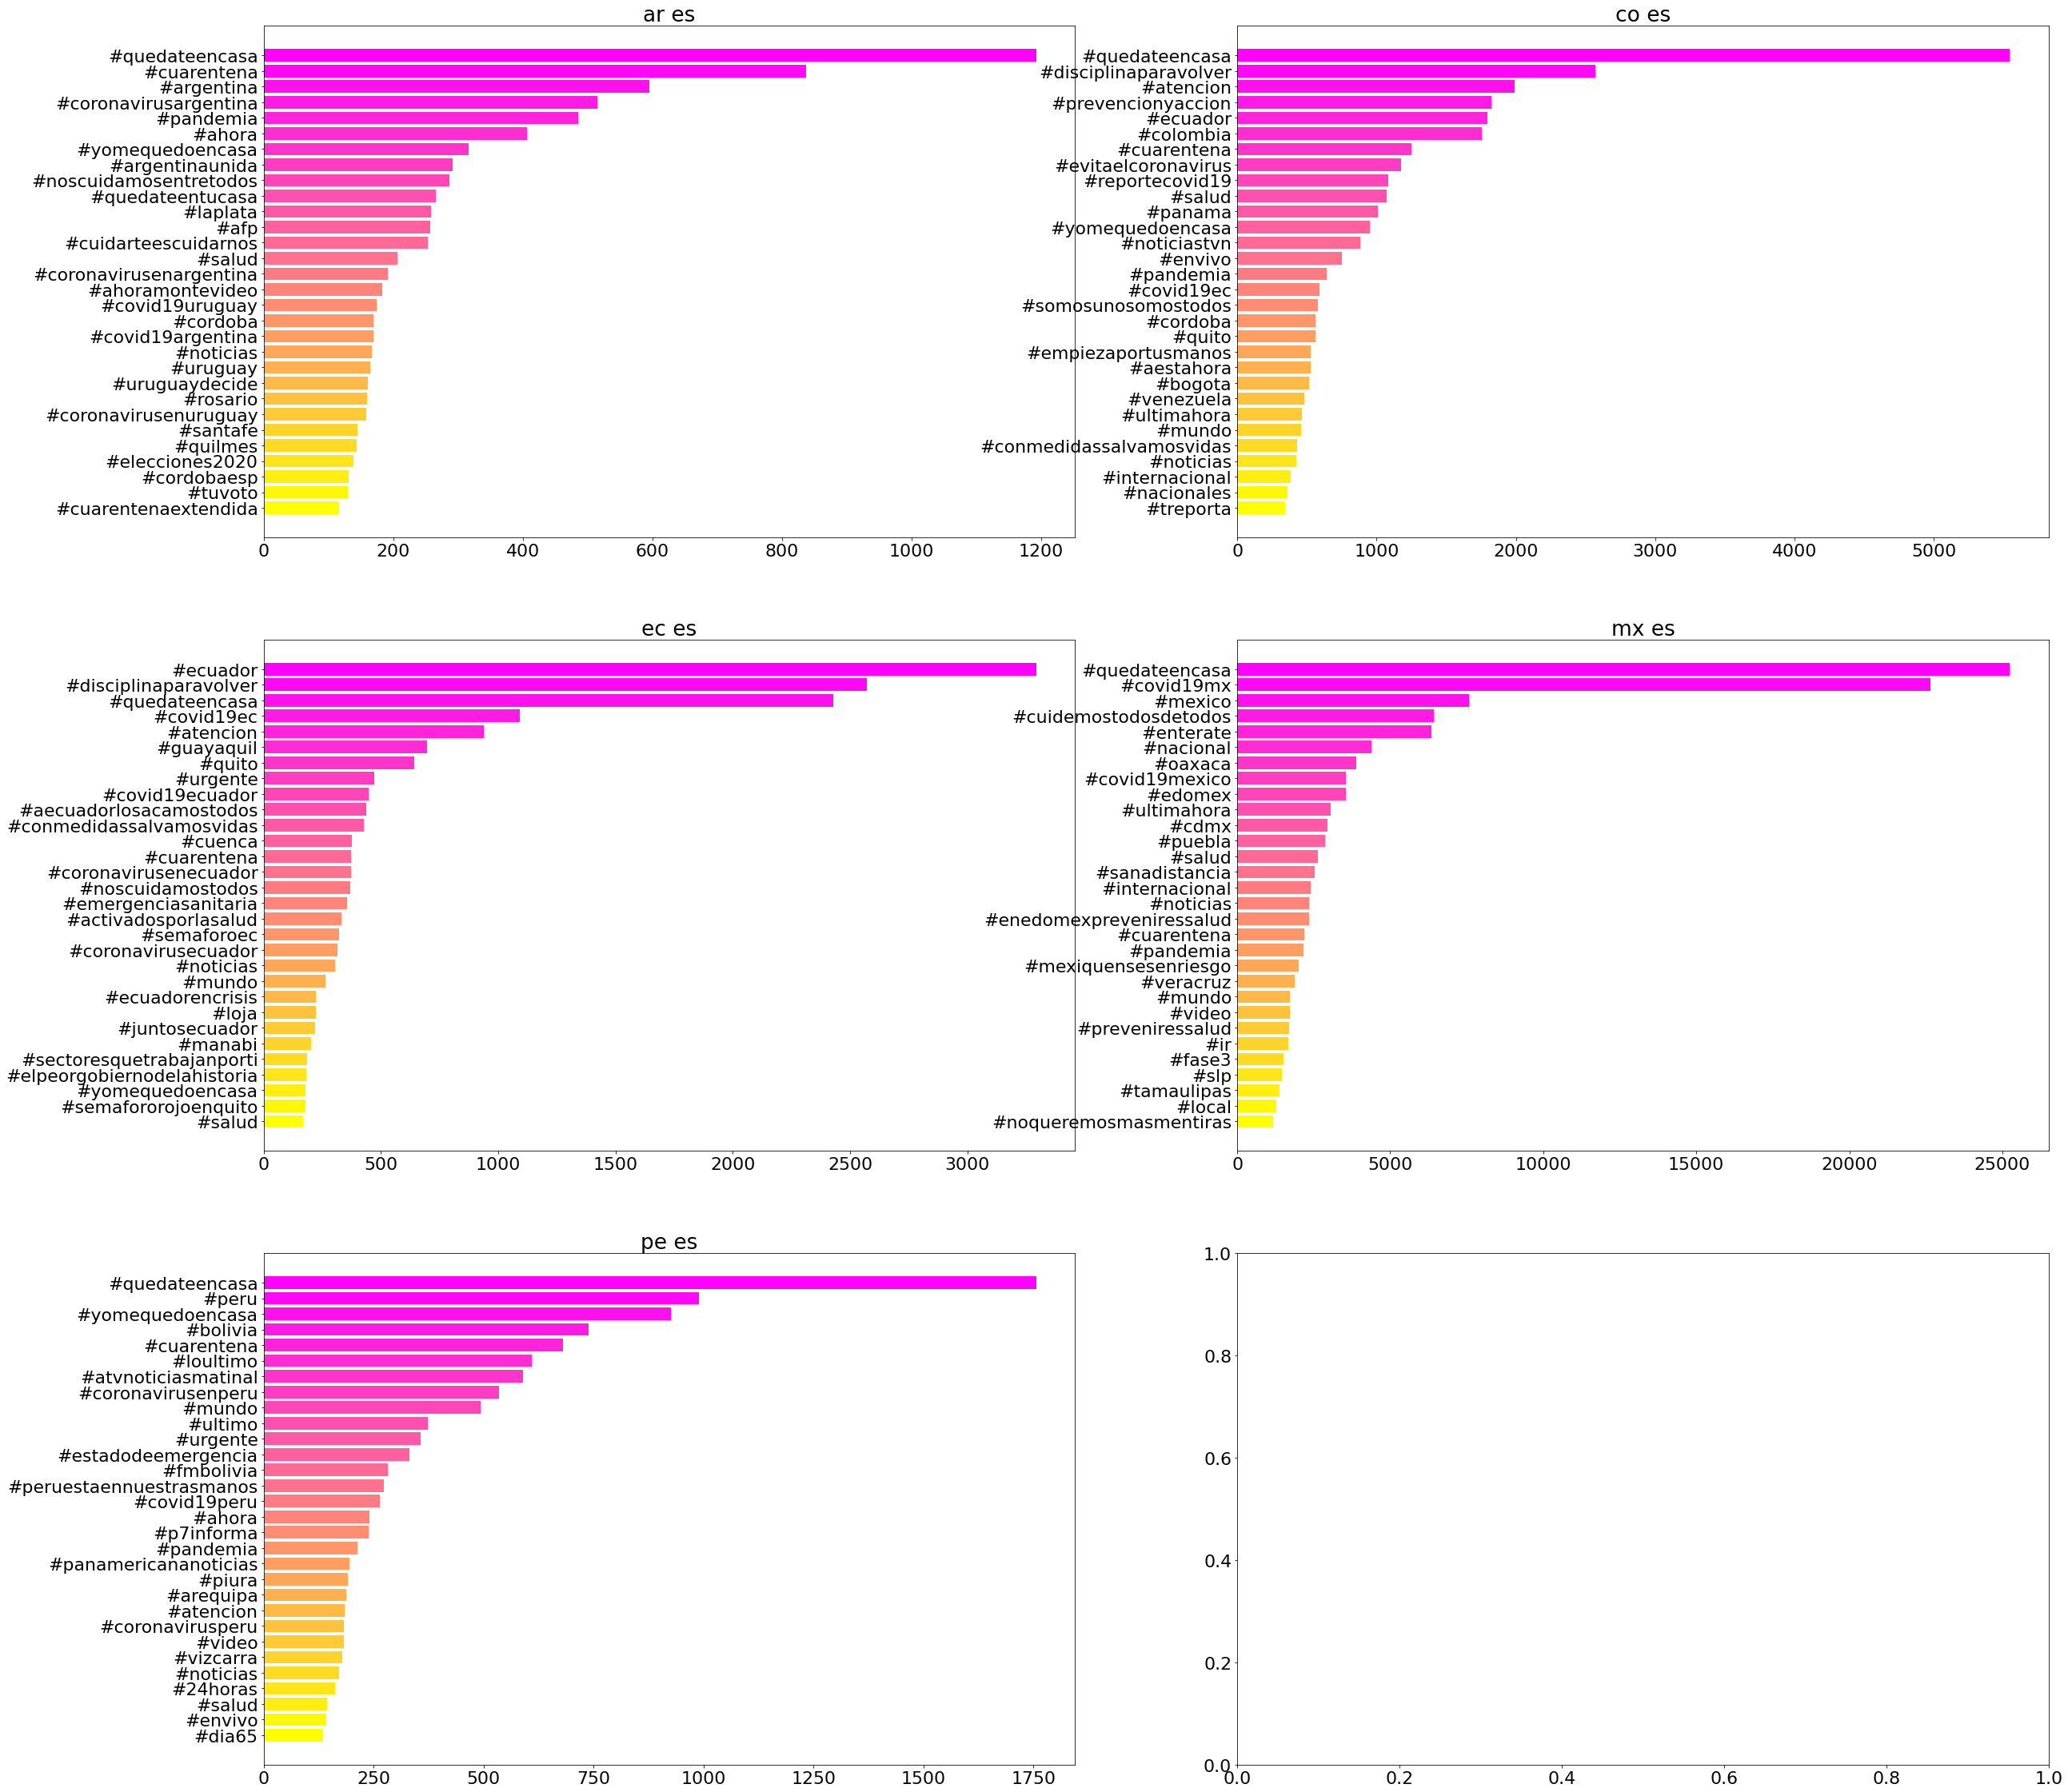

In [126]:
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2)

### Top 30 unique words

In [127]:
col_name = "text"

In [128]:
df = df.dropna(subset=[col_name])

In [129]:
grouping = df.groupby(["geo", "lang"])[col_name]
vocab_dic = uniq_vocab_by_group(grouping)  # unique vocab dictionary 
df[col_name] = df.apply(lambda x : set(x[col_name]) & vocab_dic[(x['geo'], x['lang'])],
                        result_type='reduce', axis=1)  # filtering tweets by that dic

In [130]:
counts = {k: Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n) for k, t in grouping}

In [131]:
pprint(counts)

{('ar', 'es'): [(('artigas',), 106),
                (('sinae',), 99),
                (('udelar',), 89),
                (('asse',), 85),
                (('chascomus',), 76),
                (('pba',), 74),
                (('astori',), 69),
                (('lanus',), 63),
                (('boludos',), 58),
                (('pehuajo',), 56),
                (('creuso',), 52),
                (('pelotuda',), 52),
                (('tacuarembo',), 49),
                (('porteñas',), 46),
                (('santafesino',), 44),
                (('intendenta',), 43),
                (('chacabuco',), 42),
                (('dnu',), 41),
                (('olavarria',), 41),
                (('catamarca',), 40),
                (('berisso',), 39),
                (('unlp',), 39),
                (('cahn',), 38),
                (('tabare',), 37),
                (('pueyrredon',), 36),
                (('gualeguaychu',), 36),
                (('anii',), 35),
                (('bariloch

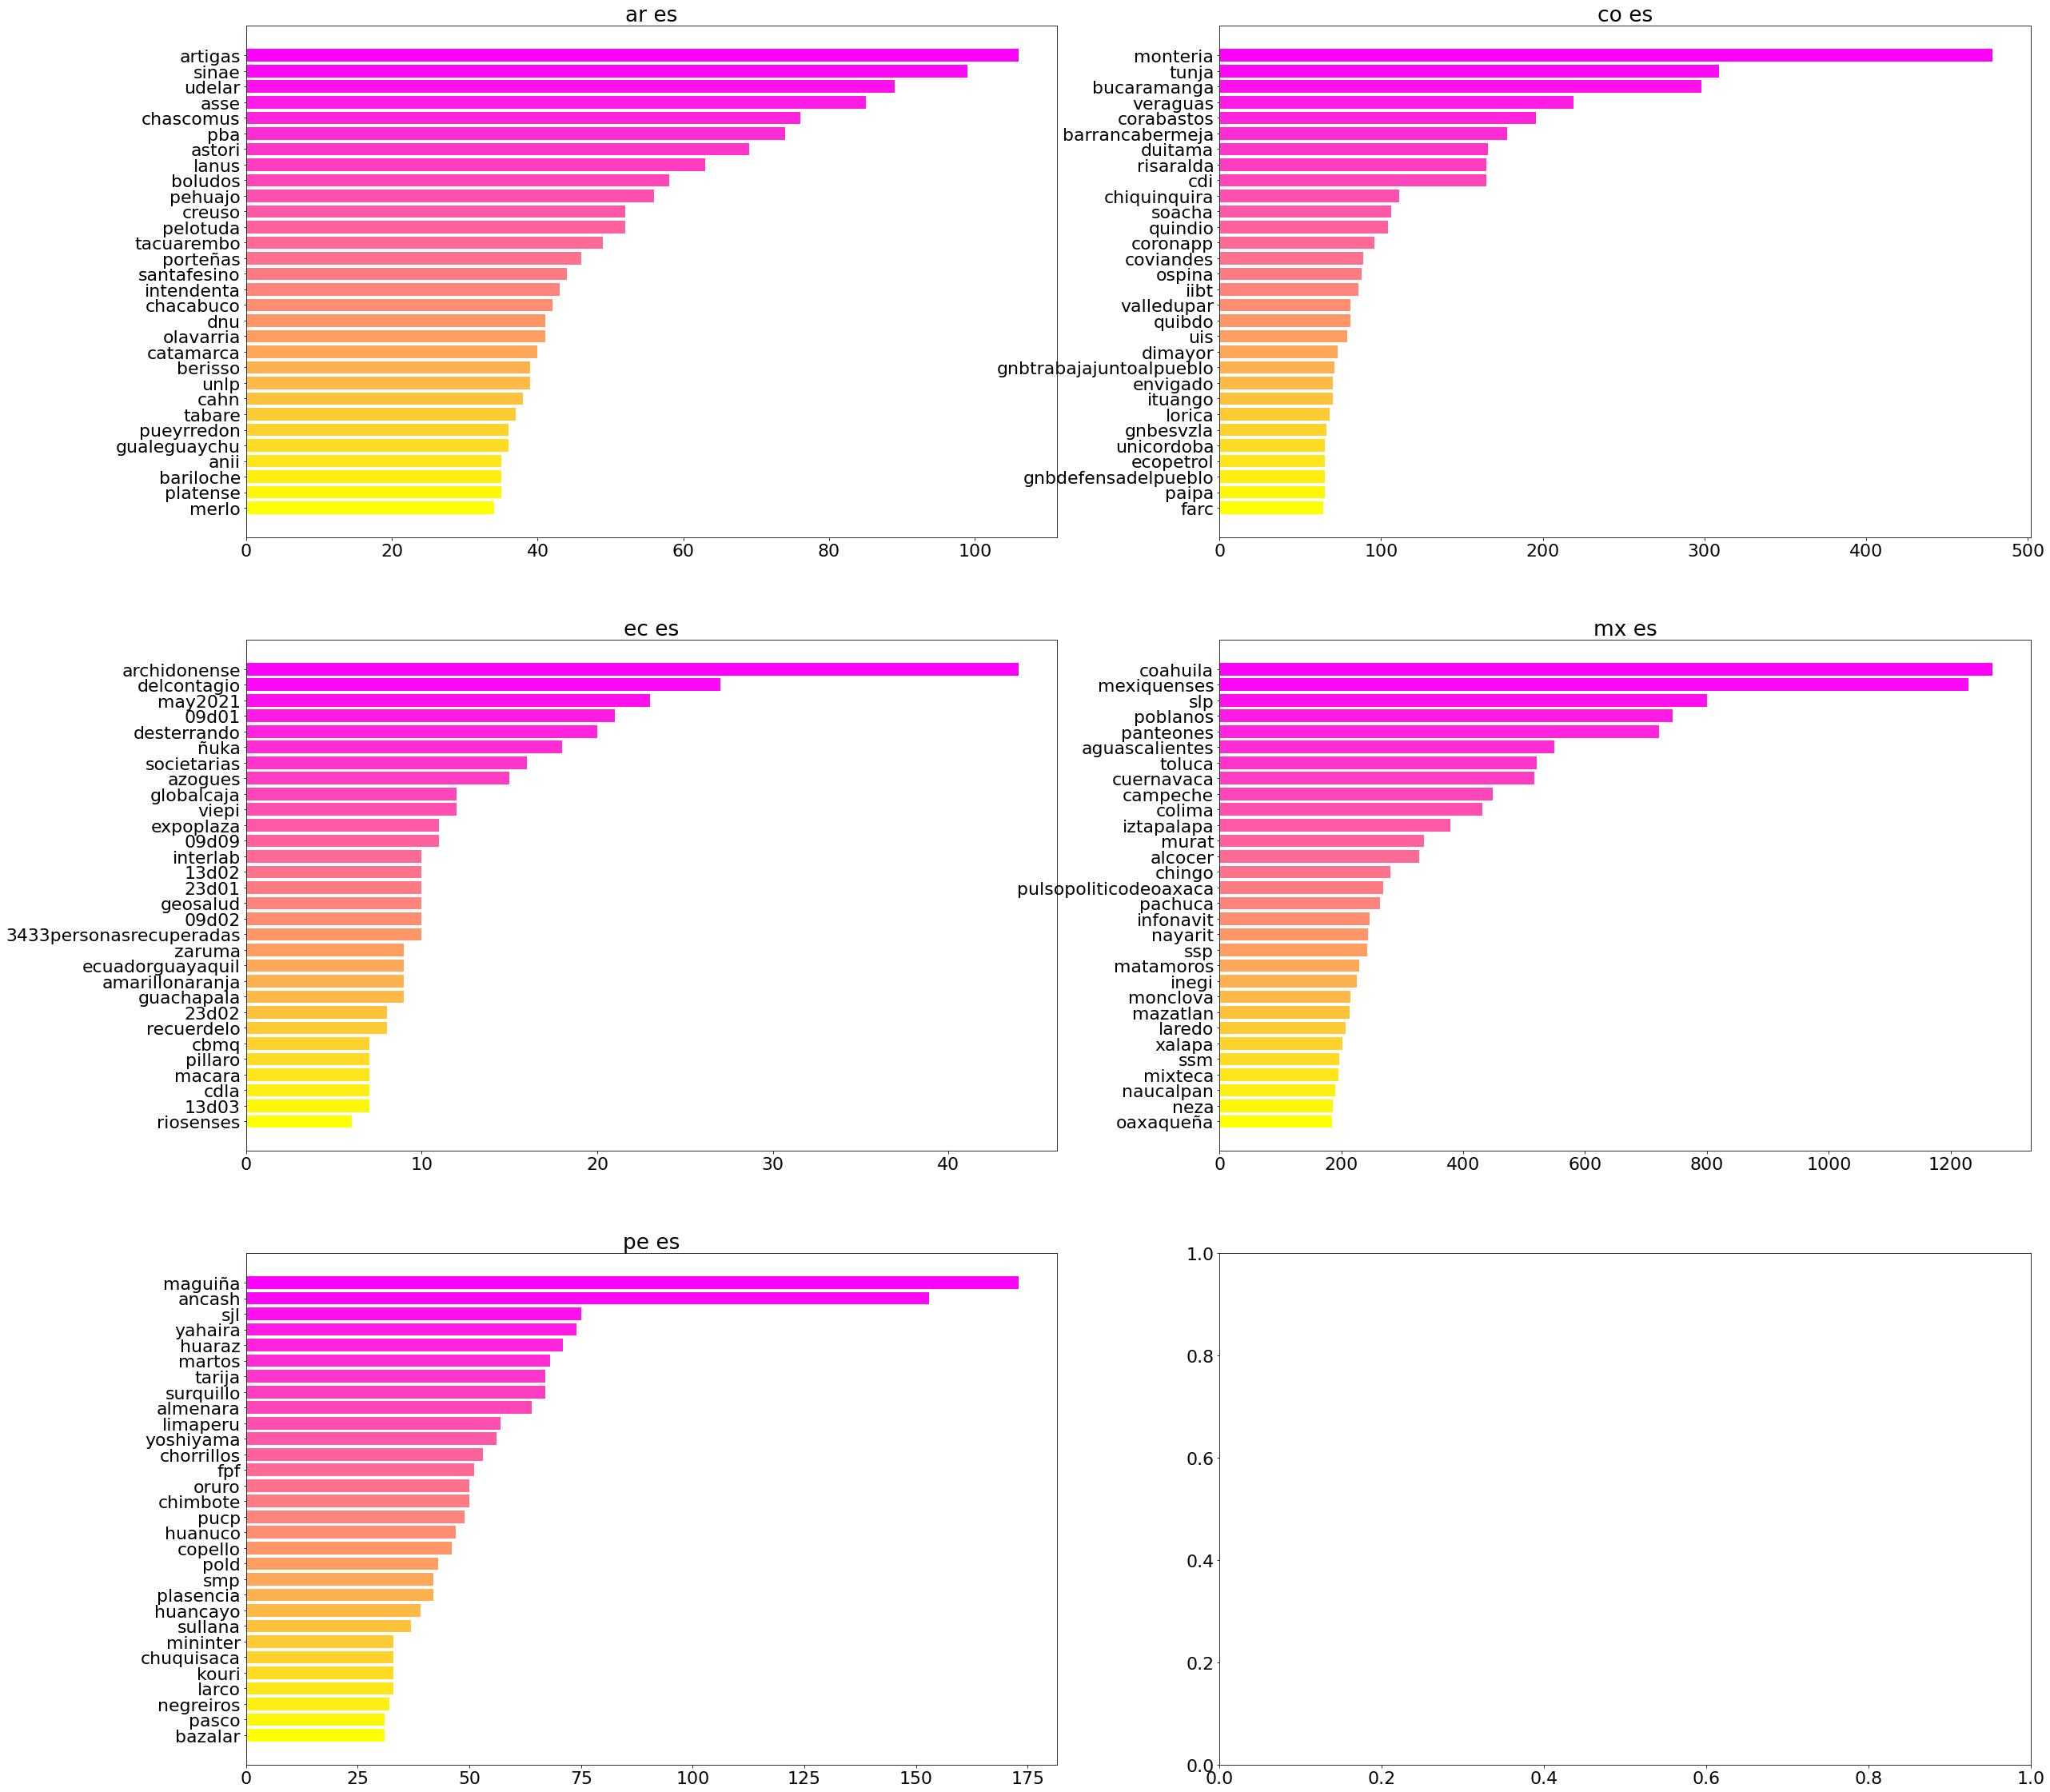

In [132]:
plot_bar_matrix(counts, num_top_words = 30, num_cols = 2)

## II. Tweet queries from May 26, 2020 to June 26, 2020:

In [45]:
!python3 coveet.py query -g ar co ec mx pe -l es -d 2020-05-26 2020-06-26

Namespace(all=False, date=[datetime.datetime(2020, 5, 26, 0, 0), datetime.datetime(2020, 6, 26, 0, 0)], func=<function handle_query at 0x7f2a7461d4c0>, geo=['ar', 'co', 'ec', 'mx', 'pe'], lang=['es'], search=None)
wrote df to dhcovid_2020-5-26_2020-6-26_es_ar_co_ec_mx_pe.csv 🎉


In [133]:
df = pd.read_csv('dhcovid_2020-5-26_2020-6-26_es_ar_co_ec_mx_pe.csv', index_col=0)

In [135]:
!python3 coveet.py tidy -file dhcovid_2020-5-26_2020-6-26_es_ar_co_ec_mx_pe.csv -stopwords ../stopwords/stopwords_es.txt ../stopwords/stopwords_hashtags.txt

Namespace(file='dhcovid_2020-5-26_2020-6-26_es_ar_co_ec_mx_pe.csv', func=<function handle_tidy at 0x7f6f28a07670>, lemmatize=False, search=None, stopwords=['../stopwords/stopwords_es.txt', '../stopwords/stopwords_hashtags.txt'])
wrote tidied df to dhcovid_2020-5-26_2020-6-26_es_ar_co_ec_mx_pe_stopworded.csv 🎉


In [136]:
df = pd.read_csv('dhcovid_2020-5-26_2020-6-26_es_ar_co_ec_mx_pe_stopworded.csv', index_col=0)

In [137]:
df['date'] = pd.to_datetime(df['date'])
df['text'] = df['text'].str.split()
df['hashtags'] = df['hashtags'].str.split()

### Top 30 words 

In [138]:
top_n = 30  # top 30 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'text'  # set to either 'text' or 'hashtags'
df_text = df.dropna(subset=[col_name]) 
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df_text.groupby(["geo", "lang"])[col_name]}

In [139]:
pprint(counts)

{('ar', 'es'): [(('casos',), 8989),
                (('nuevos',), 3603),
                (('positivo',), 3597),
                (('hoy',), 3340),
                (('coronavirus',), 3166),
                (('caso',), 3135),
                (('pandemia',), 3095),
                (('salud',), 2766),
                (('personas',), 2728),
                (('pais',), 2558),
                (('cuarentena',), 2521),
                (('argentina',), 2504),
                (('covid',), 2481),
                (('gente',), 2205),
                (('positivos',), 2176),
                (('nuevo',), 1803),
                (('situacion',), 1760),
                (('muertes',), 1730),
                (('pacientes',), 1704),
                (('provincia',), 1646),
                (('virus',), 1541),
                (('contagios',), 1471),
                (('ciudad',), 1441),
                (('gobierno',), 1428),
                (('mundo',), 1392),
                (('test',), 1369),
                ((

In [140]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size

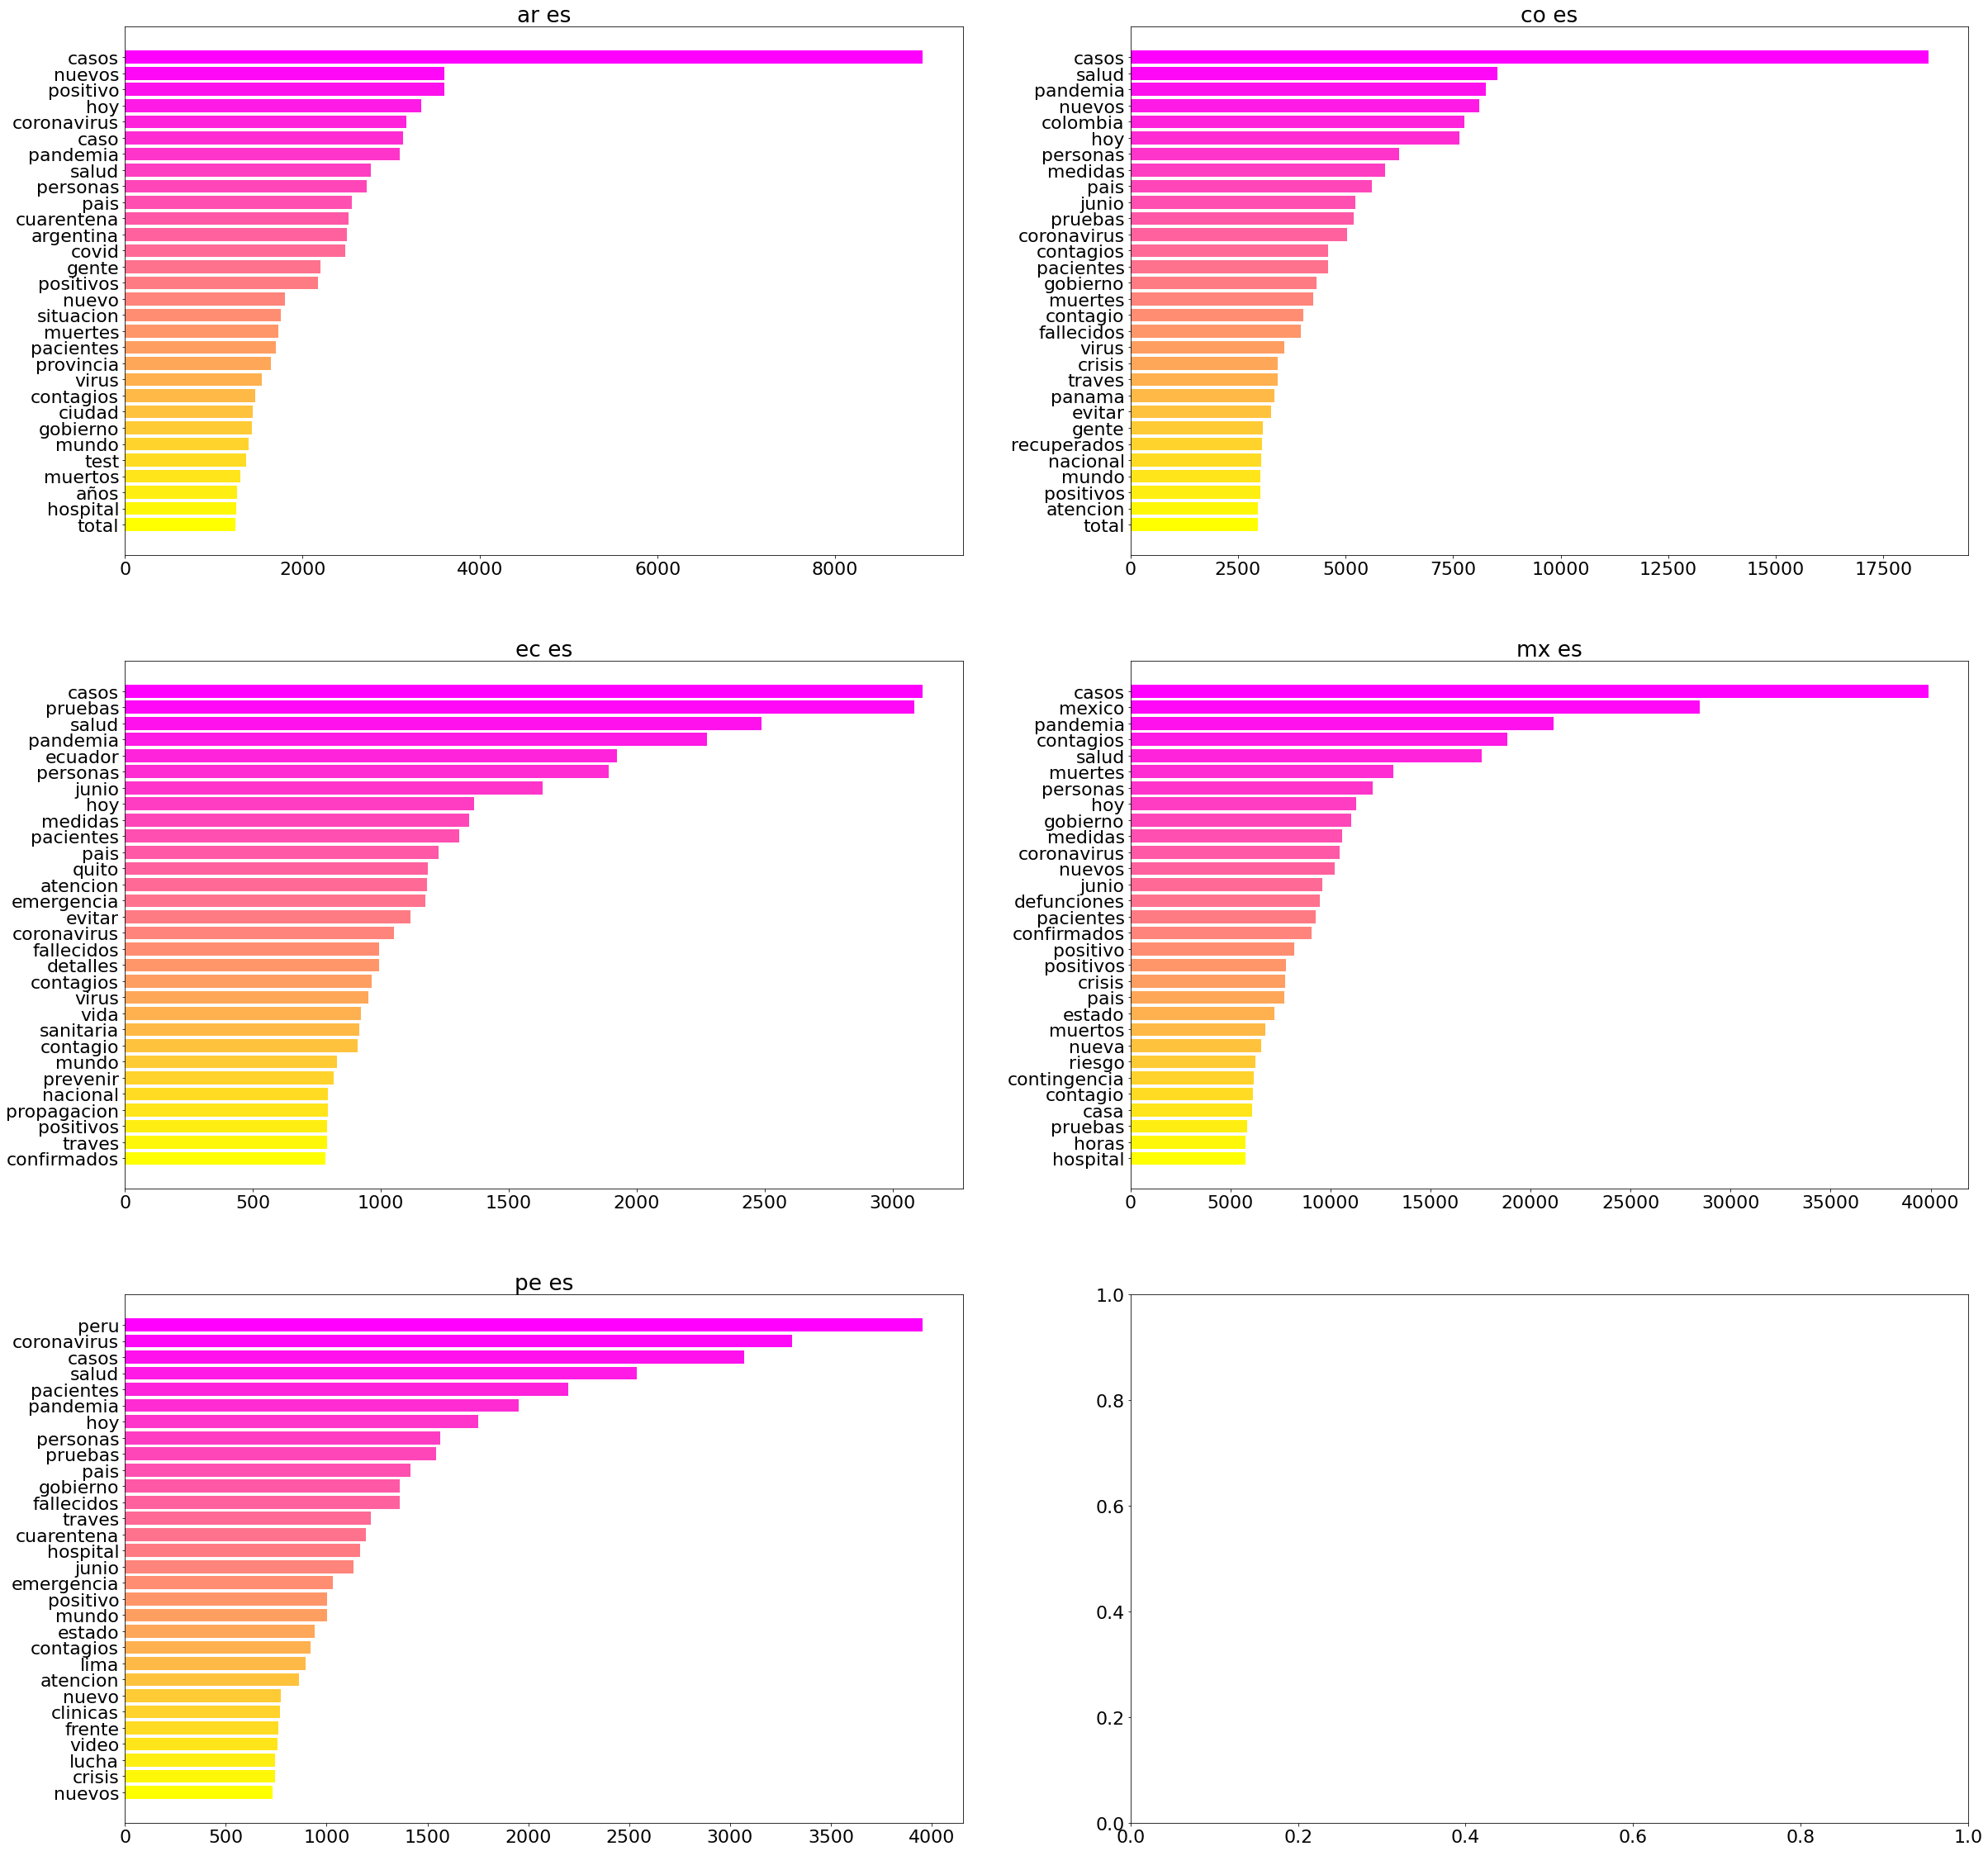

In [141]:
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2)

### Top hashtags 

In [142]:
top_n = 30  # top 30 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'hashtags'  # set to either 'text' or 'hashtags'
df_text = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df_text.groupby(["geo", "lang"])[col_name]}

In [143]:
pprint(counts)

{('ar', 'es'): [(('#quedateencasa',), 692),
                (('#cuarentena',), 513),
                (('#argentina',), 509),
                (('#ahora',), 438),
                (('#pandemia',), 421),
                (('#laplata',), 404),
                (('#coronavirusargentina',), 323),
                (('#noscuidamosentretodos',), 312),
                (('#quedateentucasa',), 281),
                (('#afp',), 238),
                (('#salud',), 236),
                (('#ahoramontevideo',), 209),
                (('#uruguaydecide',), 191),
                (('#yomequedoencasa',), 188),
                (('#covid19uruguay',), 184),
                (('#noticias',), 174),
                (('#elecciones2020',), 155),
                (('#cuidarteescuidarnos',), 154),
                (('#uruguay',), 153),
                (('#tuvoto',), 145),
                (('#rosario',), 136),
                (('#cordoba',), 129),
                (('#brasil',), 128),
                (('#raffointendente',), 

In [144]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size

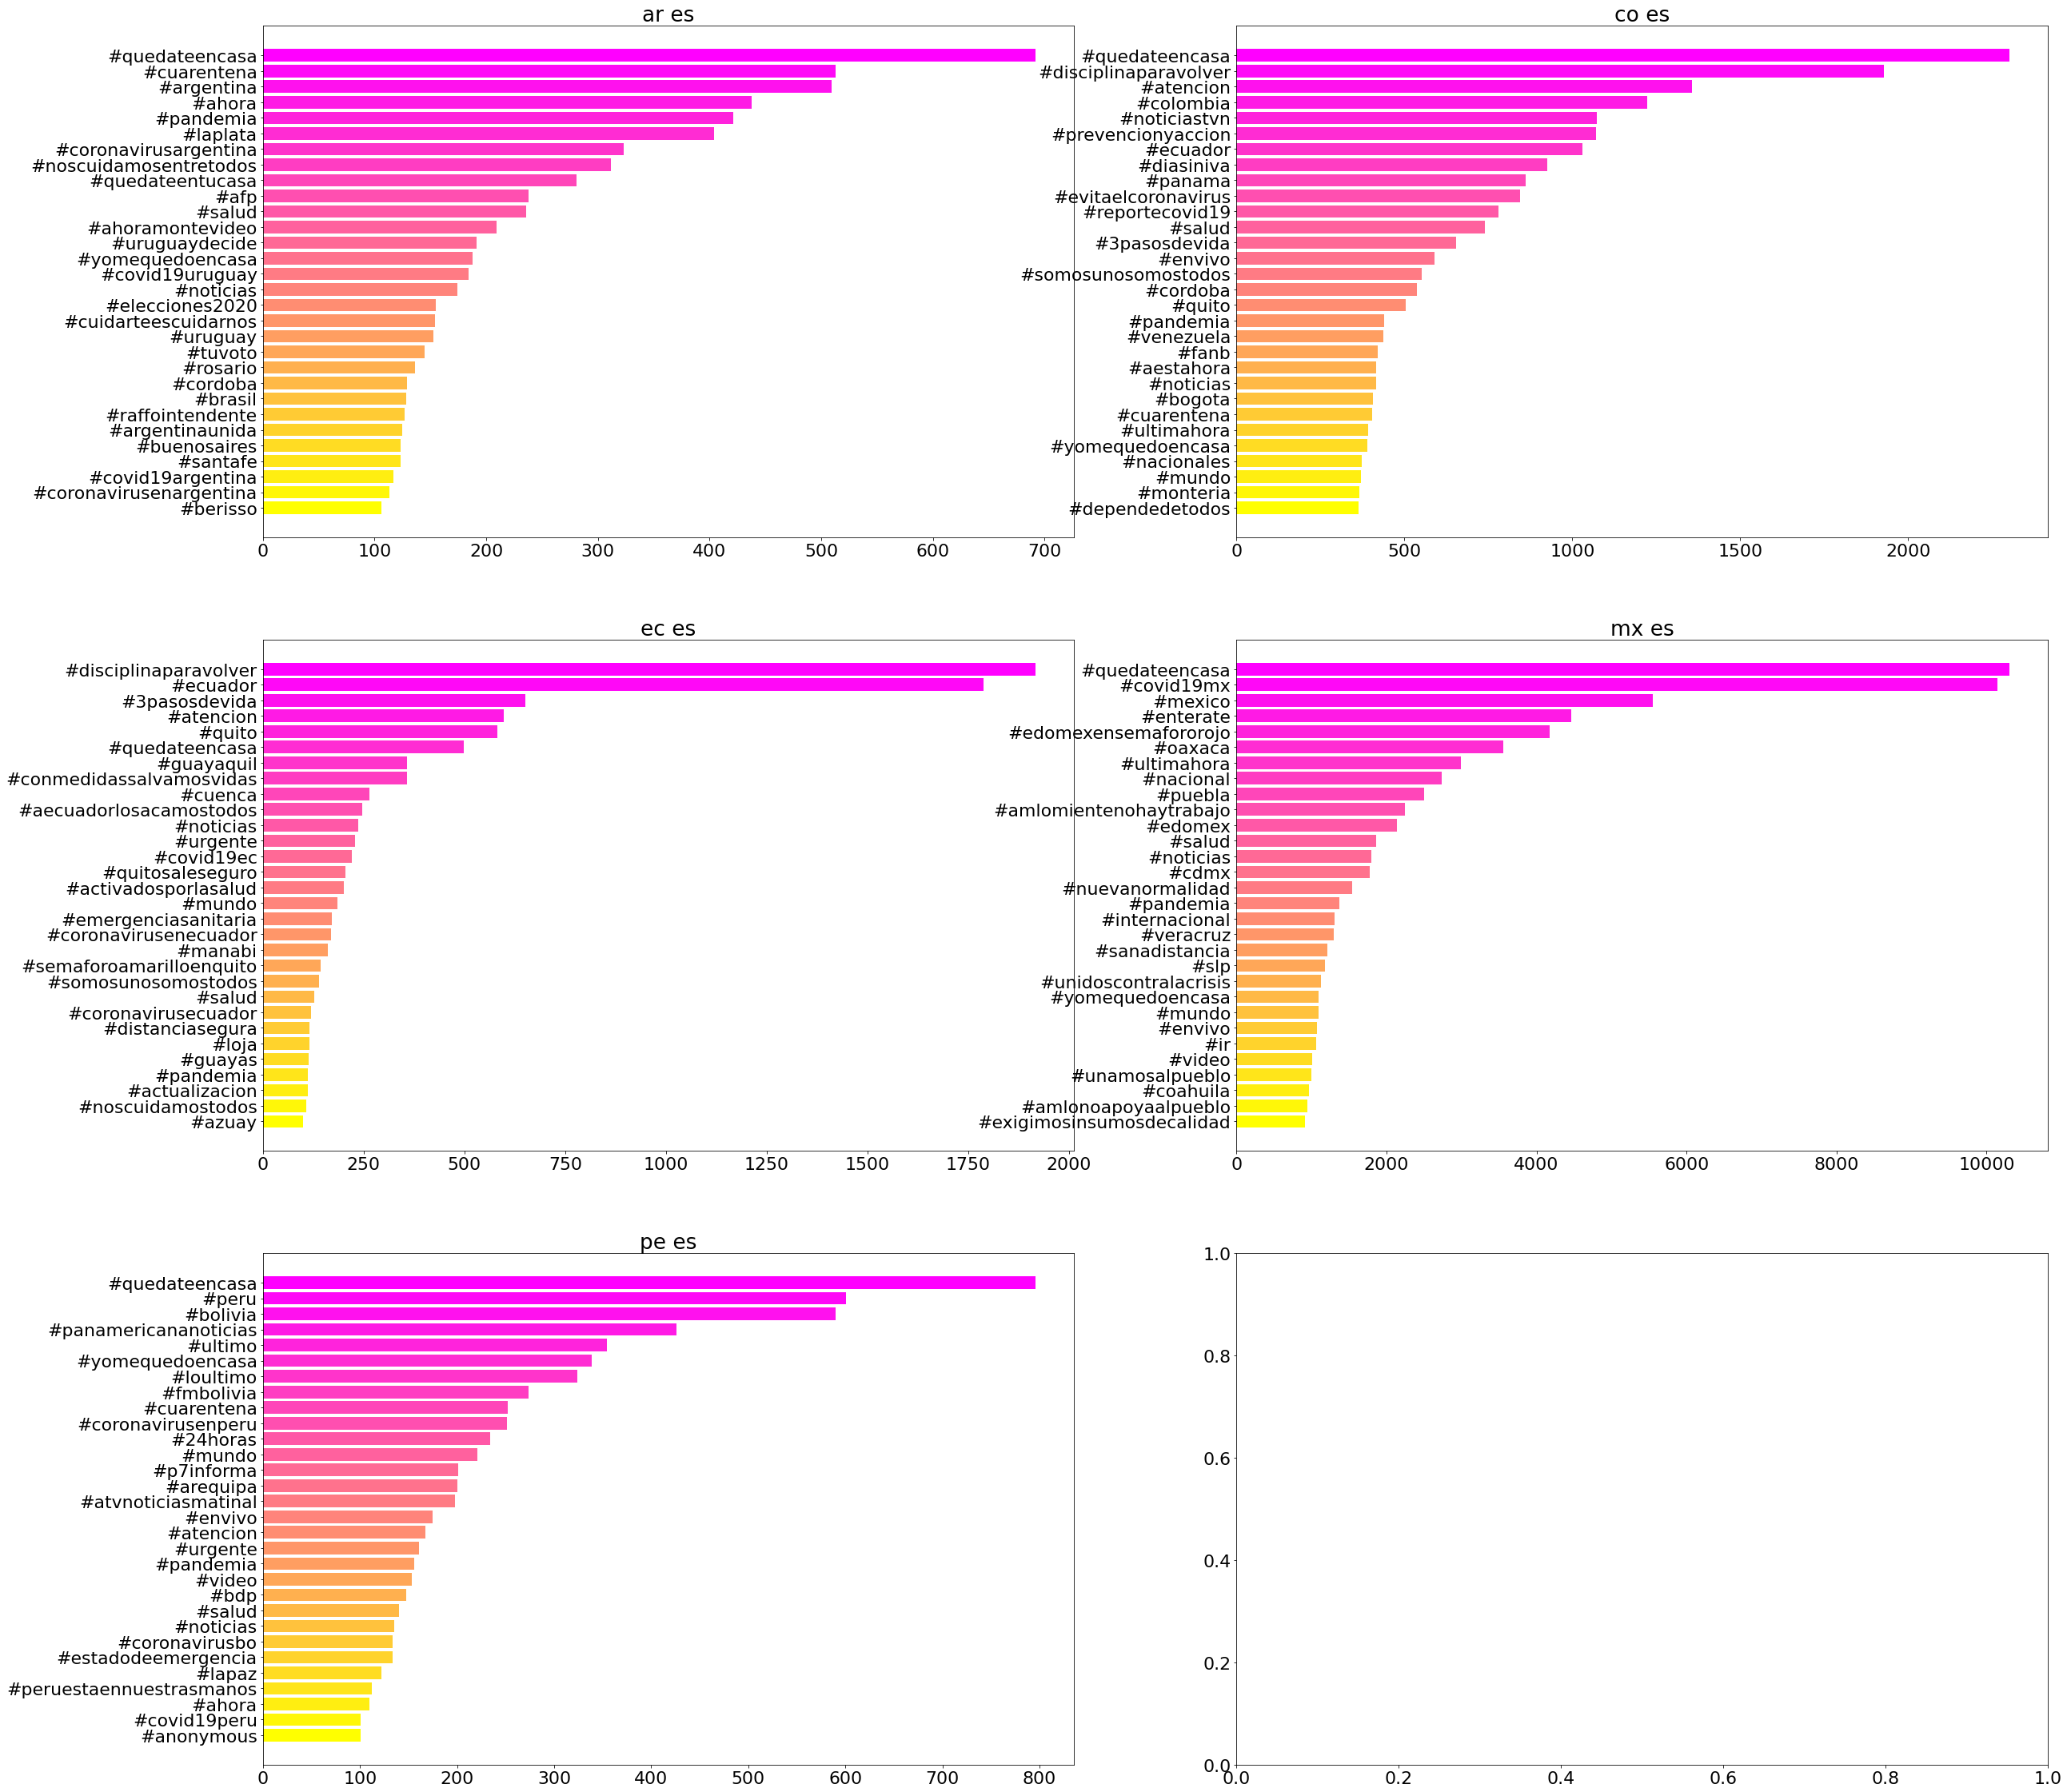

In [145]:
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2)

### Top 20 unique words, and their visualizations

In [146]:
col_name = "text"

In [147]:
df = df.dropna(subset=[col_name])

In [148]:
grouping = df.groupby(["geo", "lang"])[col_name]
vocab_dic = uniq_vocab_by_group(grouping)  # unique vocab dictionary 
df[col_name] = df.apply(lambda x : set(x[col_name]) & vocab_dic[(x['geo'], x['lang'])],
                        result_type='reduce', axis=1)  # filtering tweets by that dic

In [149]:
counts = {k: Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n) for k, t in grouping}

In [150]:
pprint(counts)

{('ar', 'es'): [(('bonaerense',), 192),
                (('catamarca',), 138),
                (('lanus',), 105),
                (('telefe',), 96),
                (('traslasierra',), 82),
                (('pba',), 81),
                (('peronismo',), 77),
                (('bonaerenses',), 74),
                (('sinae',), 73),
                (('pibe',), 72),
                (('asse',), 68),
                (('jujuy',), 67),
                (('berisso',), 67),
                (('inscribite',), 65),
                (('gualeguaychu',), 58),
                (('besona',), 55),
                (('boludo',), 54),
                (('ezeiza',), 54),
                (('chivilcoy',), 52),
                (('chajari',), 52),
                (('belgrano',), 51),
                (('lavandina',), 48),
                (('gesell',), 47),
                (('pehuajo',), 47),
                (('bsas',), 46),
                (('creuso',), 45),
                (('comodoro',), 45),
                (('l

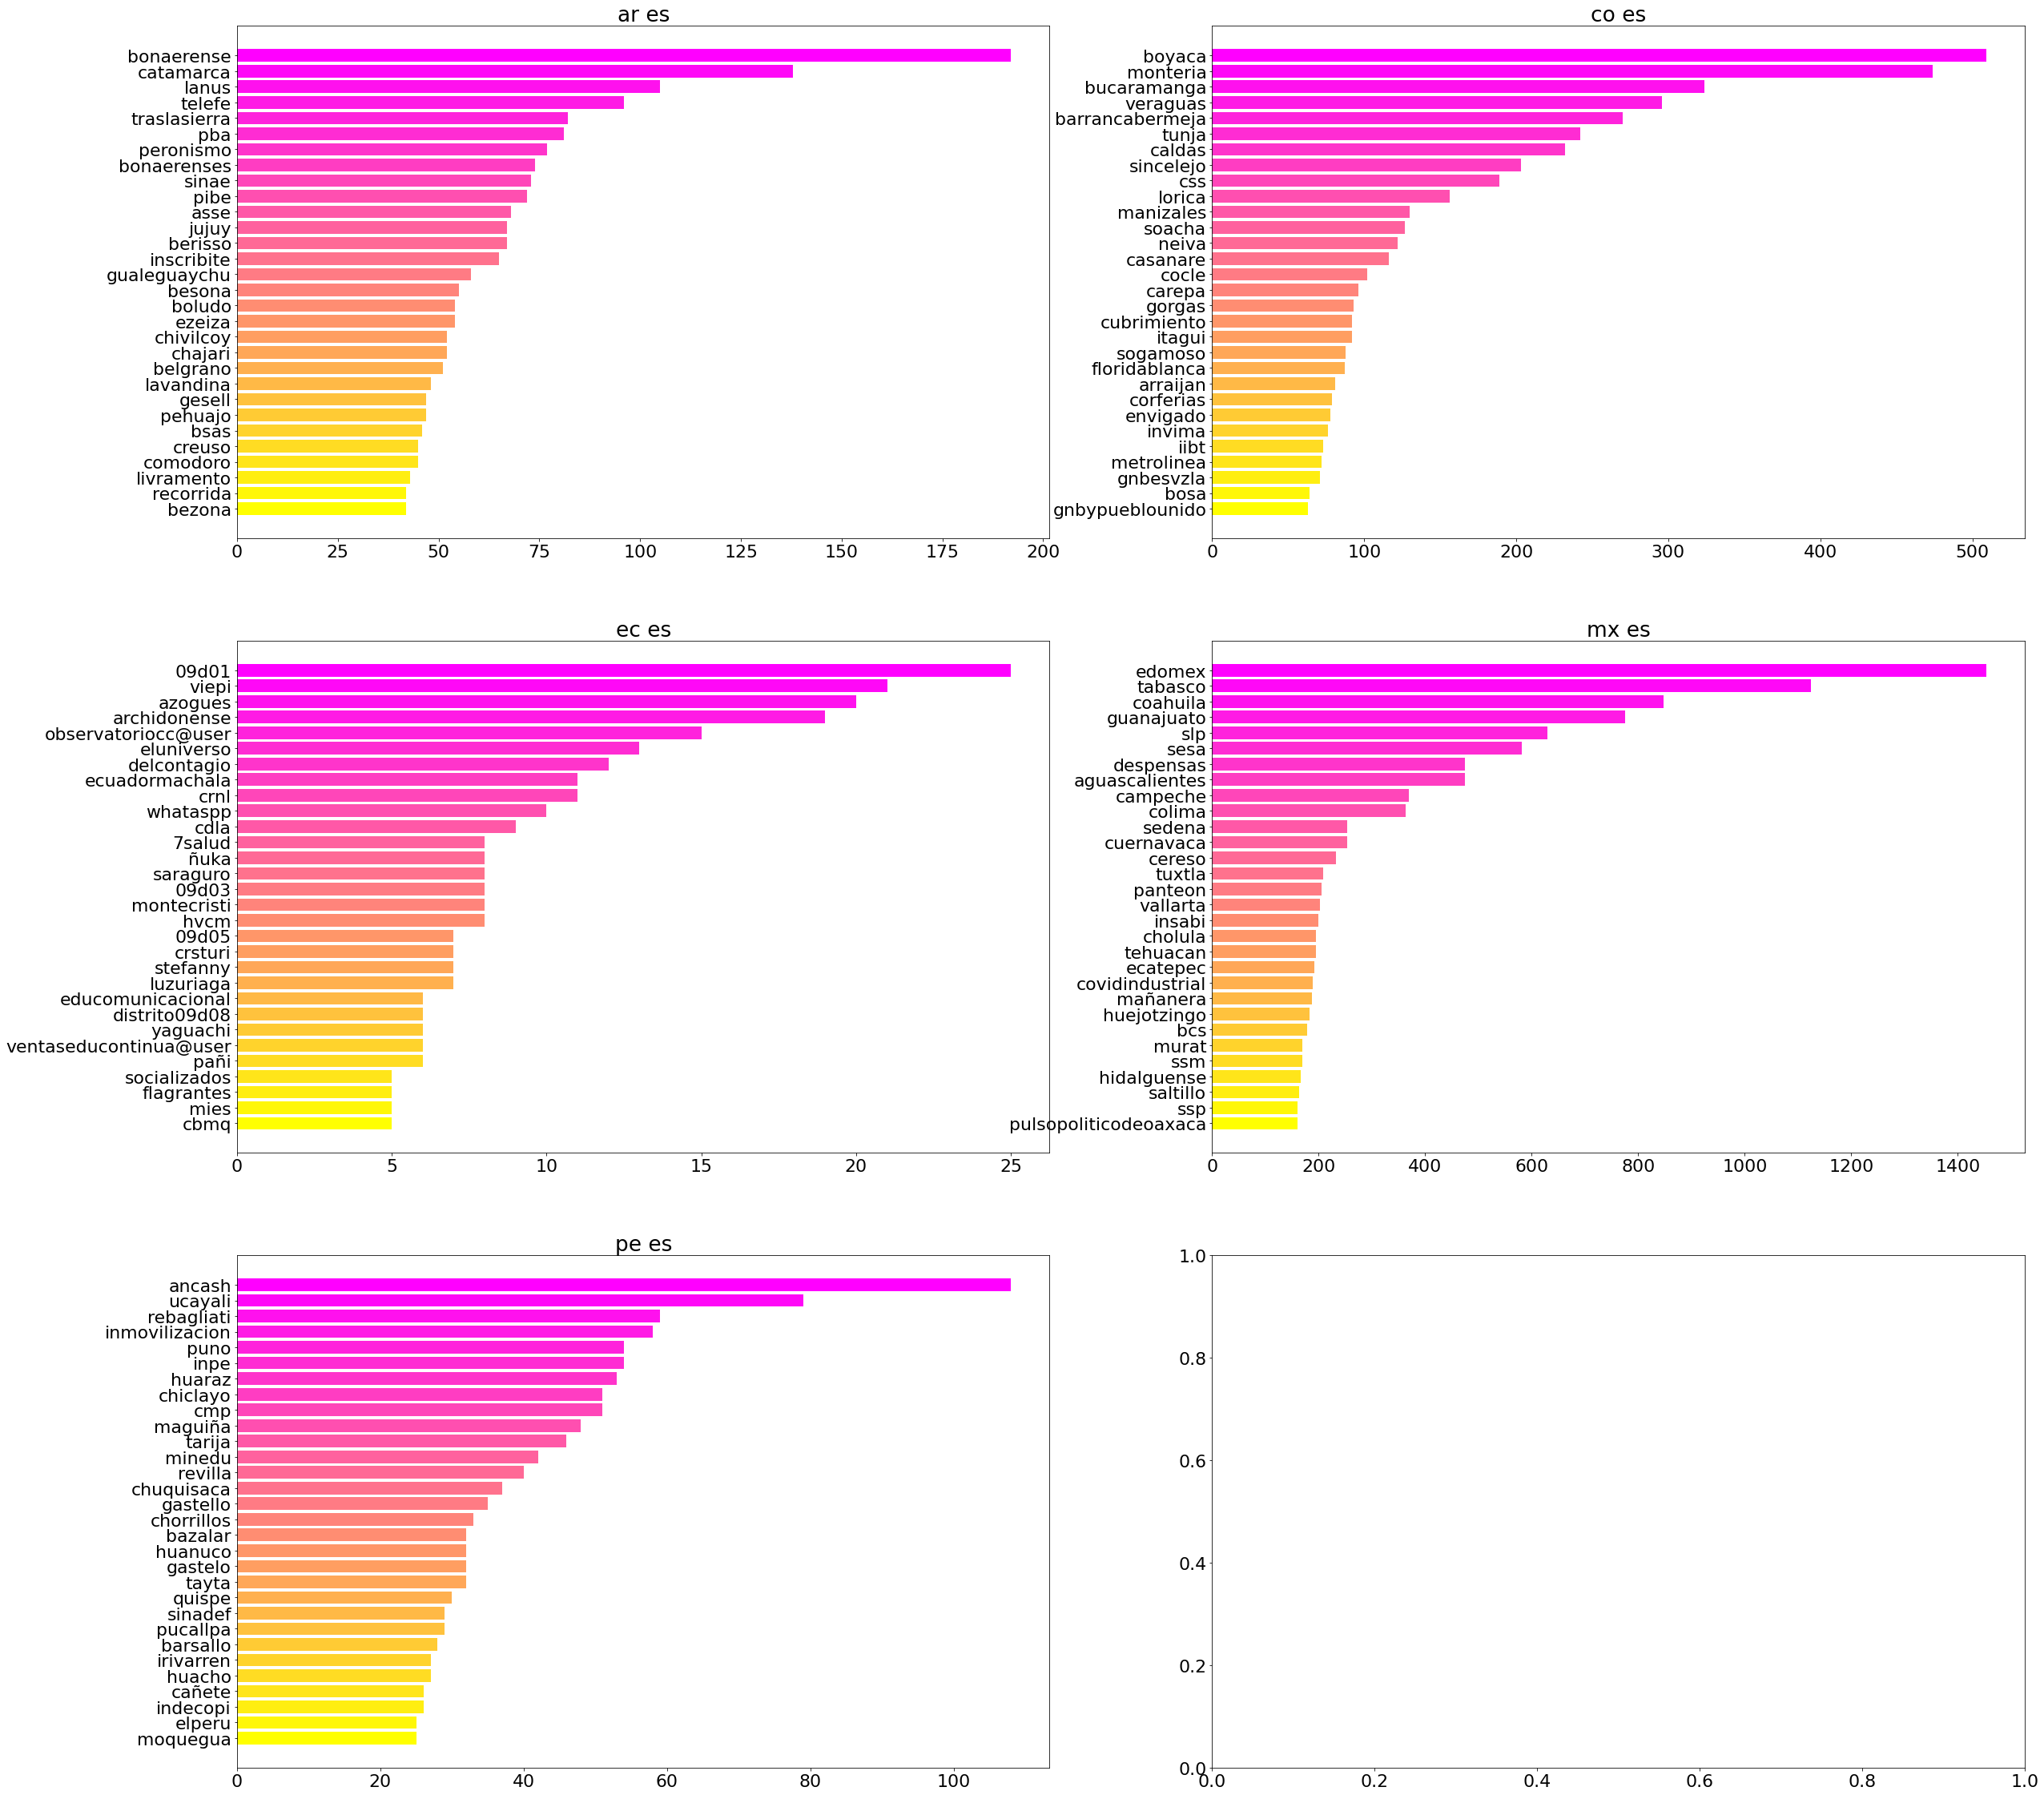

In [151]:
plot_bar_matrix(counts, num_top_words = 30, num_cols = 2)

## III. Tweet queries from June 27, 2020 to July 27, 2020:

In [56]:
!python3 coveet.py query -g ar co ec mx pe -l es -d 2020-06-27 2020-07-27

Namespace(all=False, date=[datetime.datetime(2020, 6, 27, 0, 0), datetime.datetime(2020, 7, 27, 0, 0)], func=<function handle_query at 0x7f27888294c0>, geo=['ar', 'co', 'ec', 'mx', 'pe'], lang=['es'], search=None)
wrote df to dhcovid_2020-6-27_2020-7-27_es_ar_co_ec_mx_pe.csv 🎉


In [152]:
df = pd.read_csv('dhcovid_2020-6-27_2020-7-27_es_ar_co_ec_mx_pe.csv', index_col=0)

In [153]:
!python3 coveet.py tidy -file dhcovid_2020-6-27_2020-7-27_es_ar_co_ec_mx_pe.csv -stopwords ../stopwords/stopwords_es.txt ../stopwords/stopwords_hashtags.txt

Namespace(file='dhcovid_2020-6-27_2020-7-27_es_ar_co_ec_mx_pe.csv', func=<function handle_tidy at 0x7f402f146670>, lemmatize=False, search=None, stopwords=['../stopwords/stopwords_es.txt', '../stopwords/stopwords_hashtags.txt'])
wrote tidied df to dhcovid_2020-6-27_2020-7-27_es_ar_co_ec_mx_pe_stopworded.csv 🎉


In [154]:
df = pd.read_csv('dhcovid_2020-6-27_2020-7-27_es_ar_co_ec_mx_pe_stopworded.csv', index_col=0) # run this file

In [155]:
df['date'] = pd.to_datetime(df['date'])
df['text'] = df['text'].str.split()
df['hashtags'] = df['hashtags'].str.split()

### Top 30 Words

In [156]:
top_n = 30  # top 30 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'text'  # set to either 'text' or 'hashtags'
df_text = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df_text.groupby(["geo", "lang"])[col_name]}

In [157]:
pprint(counts)

{('ar', 'es'): [(('casos',), 11206),
                (('positivo',), 5130),
                (('nuevos',), 5118),
                (('hoy',), 4034),
                (('covid',), 3894),
                (('coronavirus',), 3720),
                (('caso',), 3314),
                (('pandemia',), 3241),
                (('salud',), 3158),
                (('positivos',), 3069),
                (('argentina',), 2852),
                (('personas',), 2842),
                (('pais',), 2504),
                (('gente',), 2353),
                (('cuarentena',), 2196),
                (('vacuna',), 2168),
                (('nuevo',), 2041),
                (('muertes',), 1990),
                (('contagios',), 1971),
                (('provincia',), 1954),
                (('pacientes',), 1868),
                (('situacion',), 1737),
                (('años',), 1685),
                (('virus',), 1600),
                (('bolsonaro',), 1598),
                (('ciudad',), 1584),
               

In [158]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size

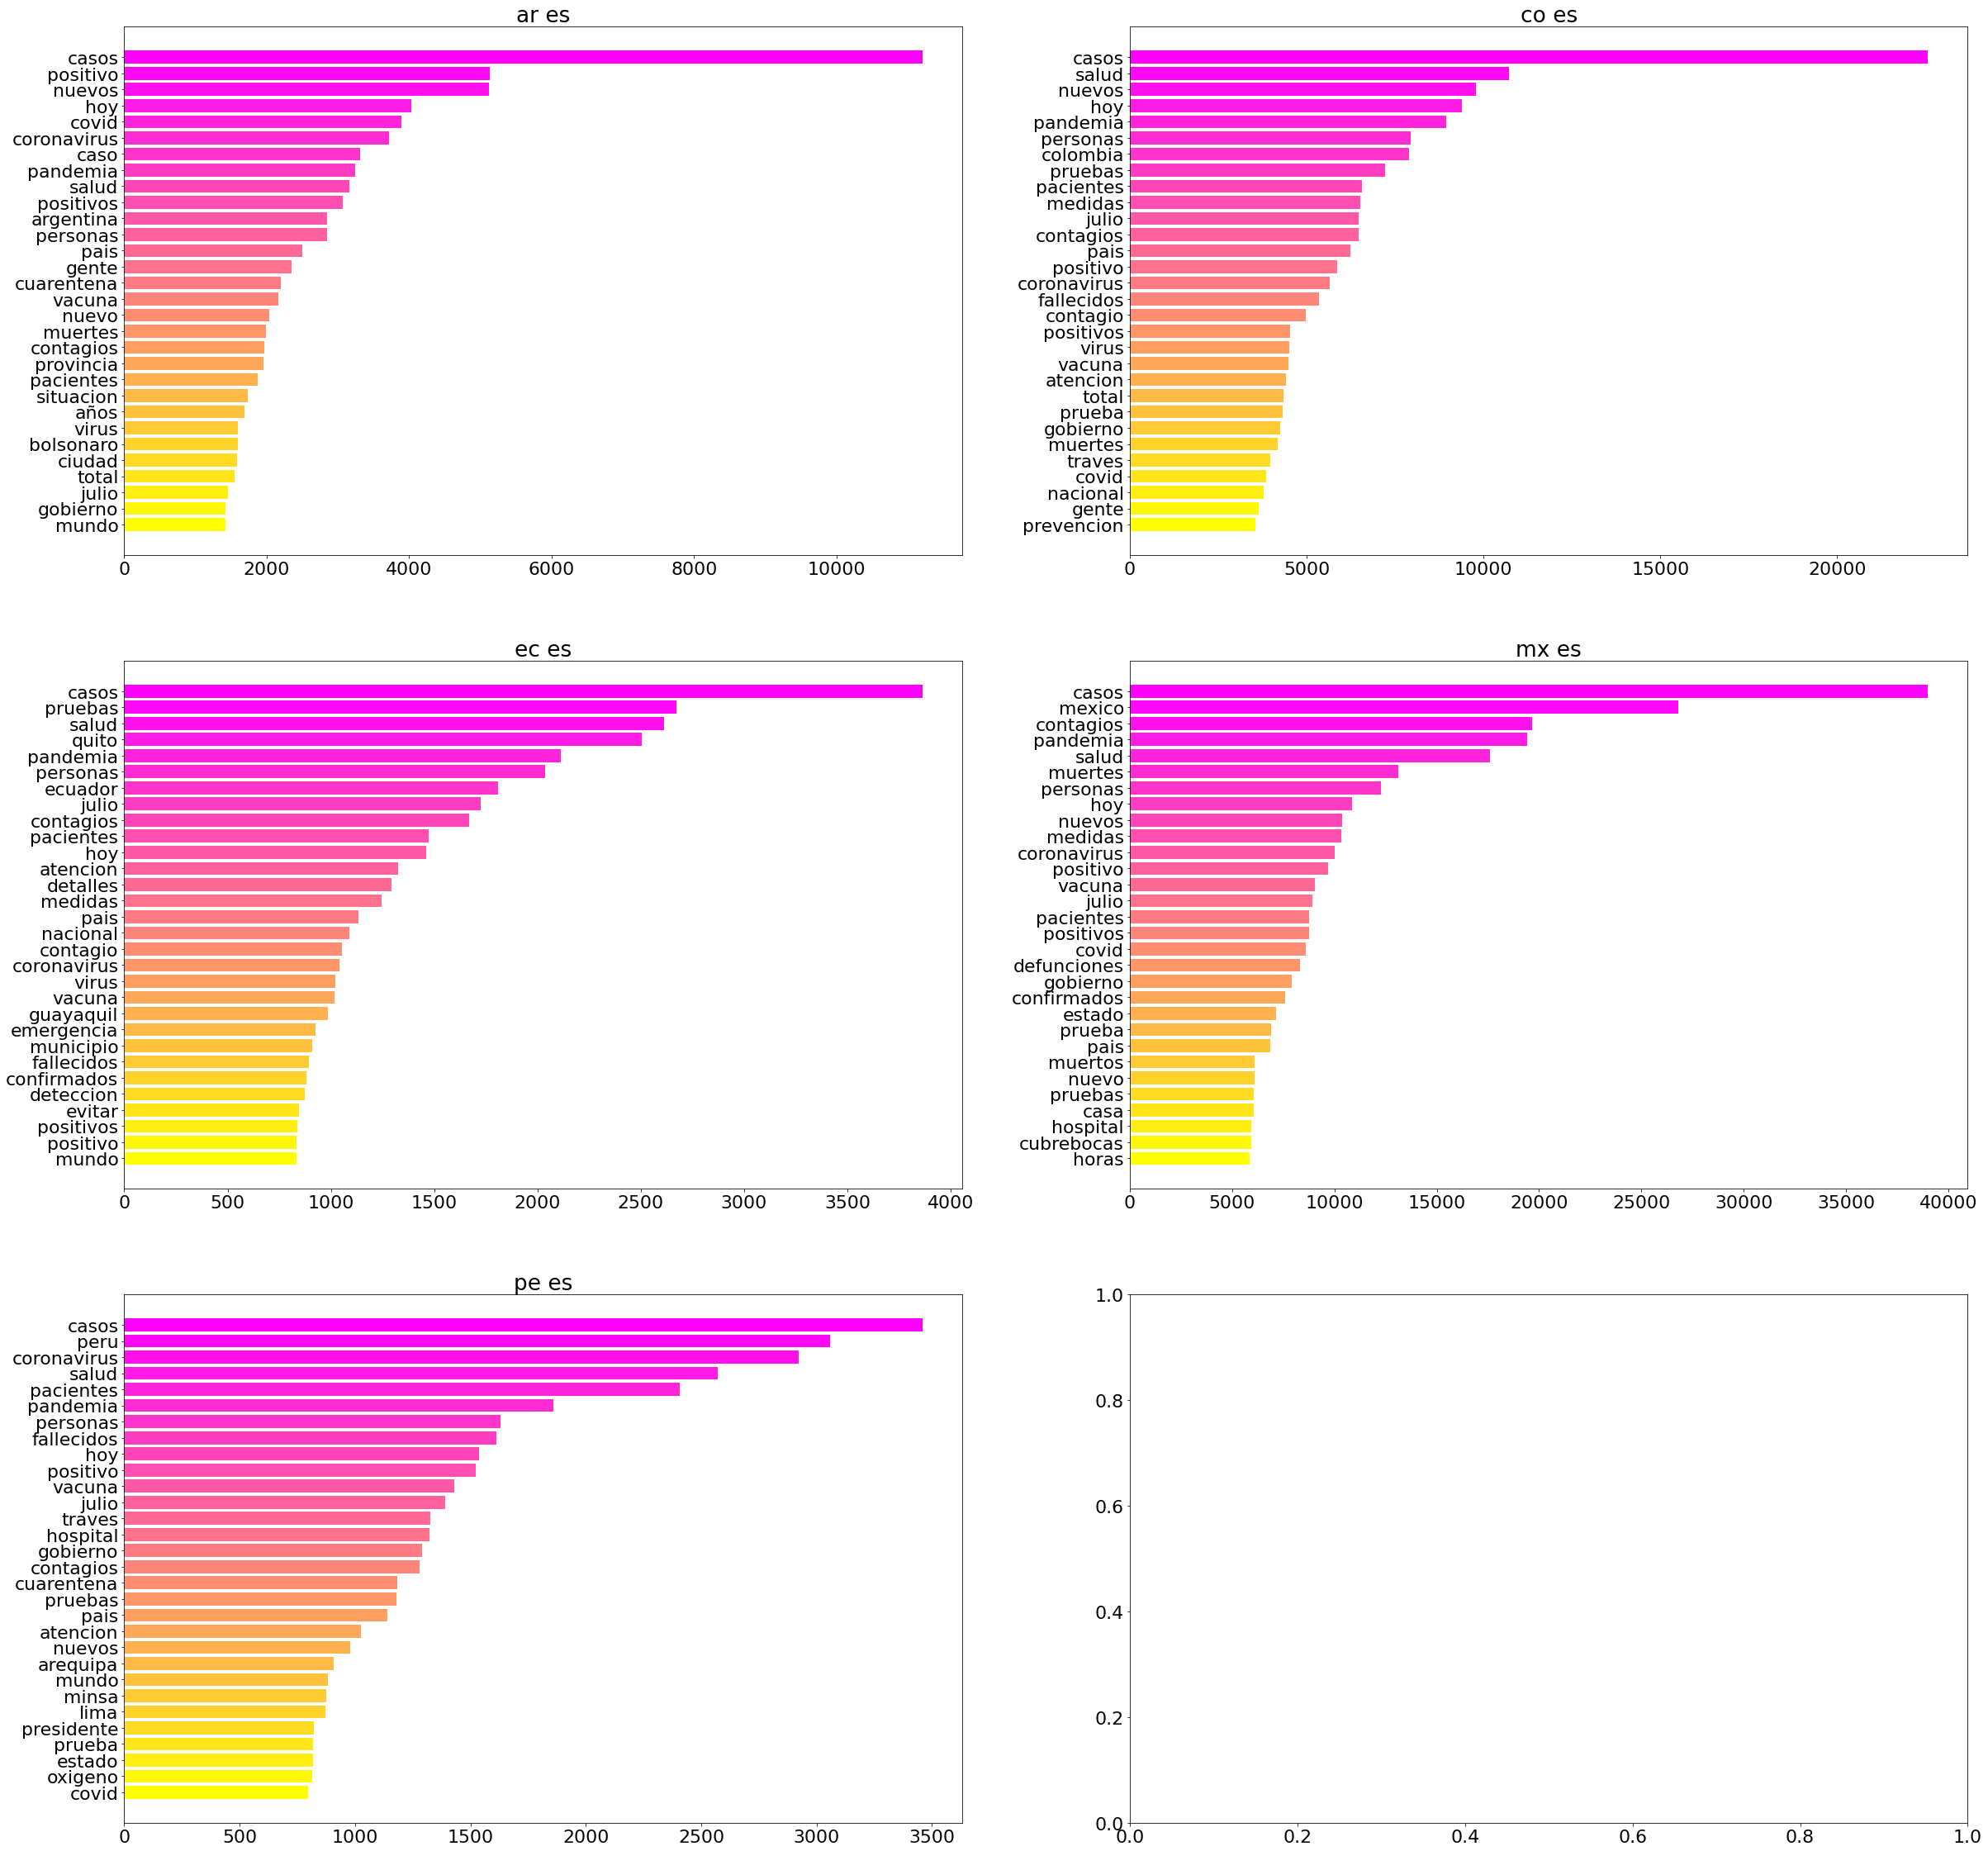

In [159]:
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2)

### Top 30 Hashtags

In [160]:
top_n = 30  # top 30 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'hashtags'  # set to either 'text' or 'hashtags'
df_text = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df_text.groupby(["geo", "lang"])[col_name]}

In [161]:
pprint(counts)

{('ar', 'es'): [(('#quedateencasa',), 671),
                (('#ahora',), 562),
                (('#argentina',), 502),
                (('#pandemia',), 425),
                (('#cuarentena',), 387),
                (('#quedateentucasa',), 351),
                (('#noscuidamosentretodos',), 321),
                (('#laplata',), 299),
                (('#coronavirusargentina',), 296),
                (('#salud',), 270),
                (('#noticias',), 234),
                (('#ahoramontevideo',), 233),
                (('#uruguaydecide',), 215),
                (('#rosario',), 210),
                (('#afp',), 210),
                (('#elecciones2020',), 181),
                (('#cuidarteescuidarnos',), 175),
                (('#tuvoto',), 166),
                (('#buenosaires',), 165),
                (('#santafe',), 164),
                (('#cordoba',), 153),
                (('#covid19uruguay',), 151),
                (('#quilmes',), 138),
                (('#uruguay',), 135),
     

In [162]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size

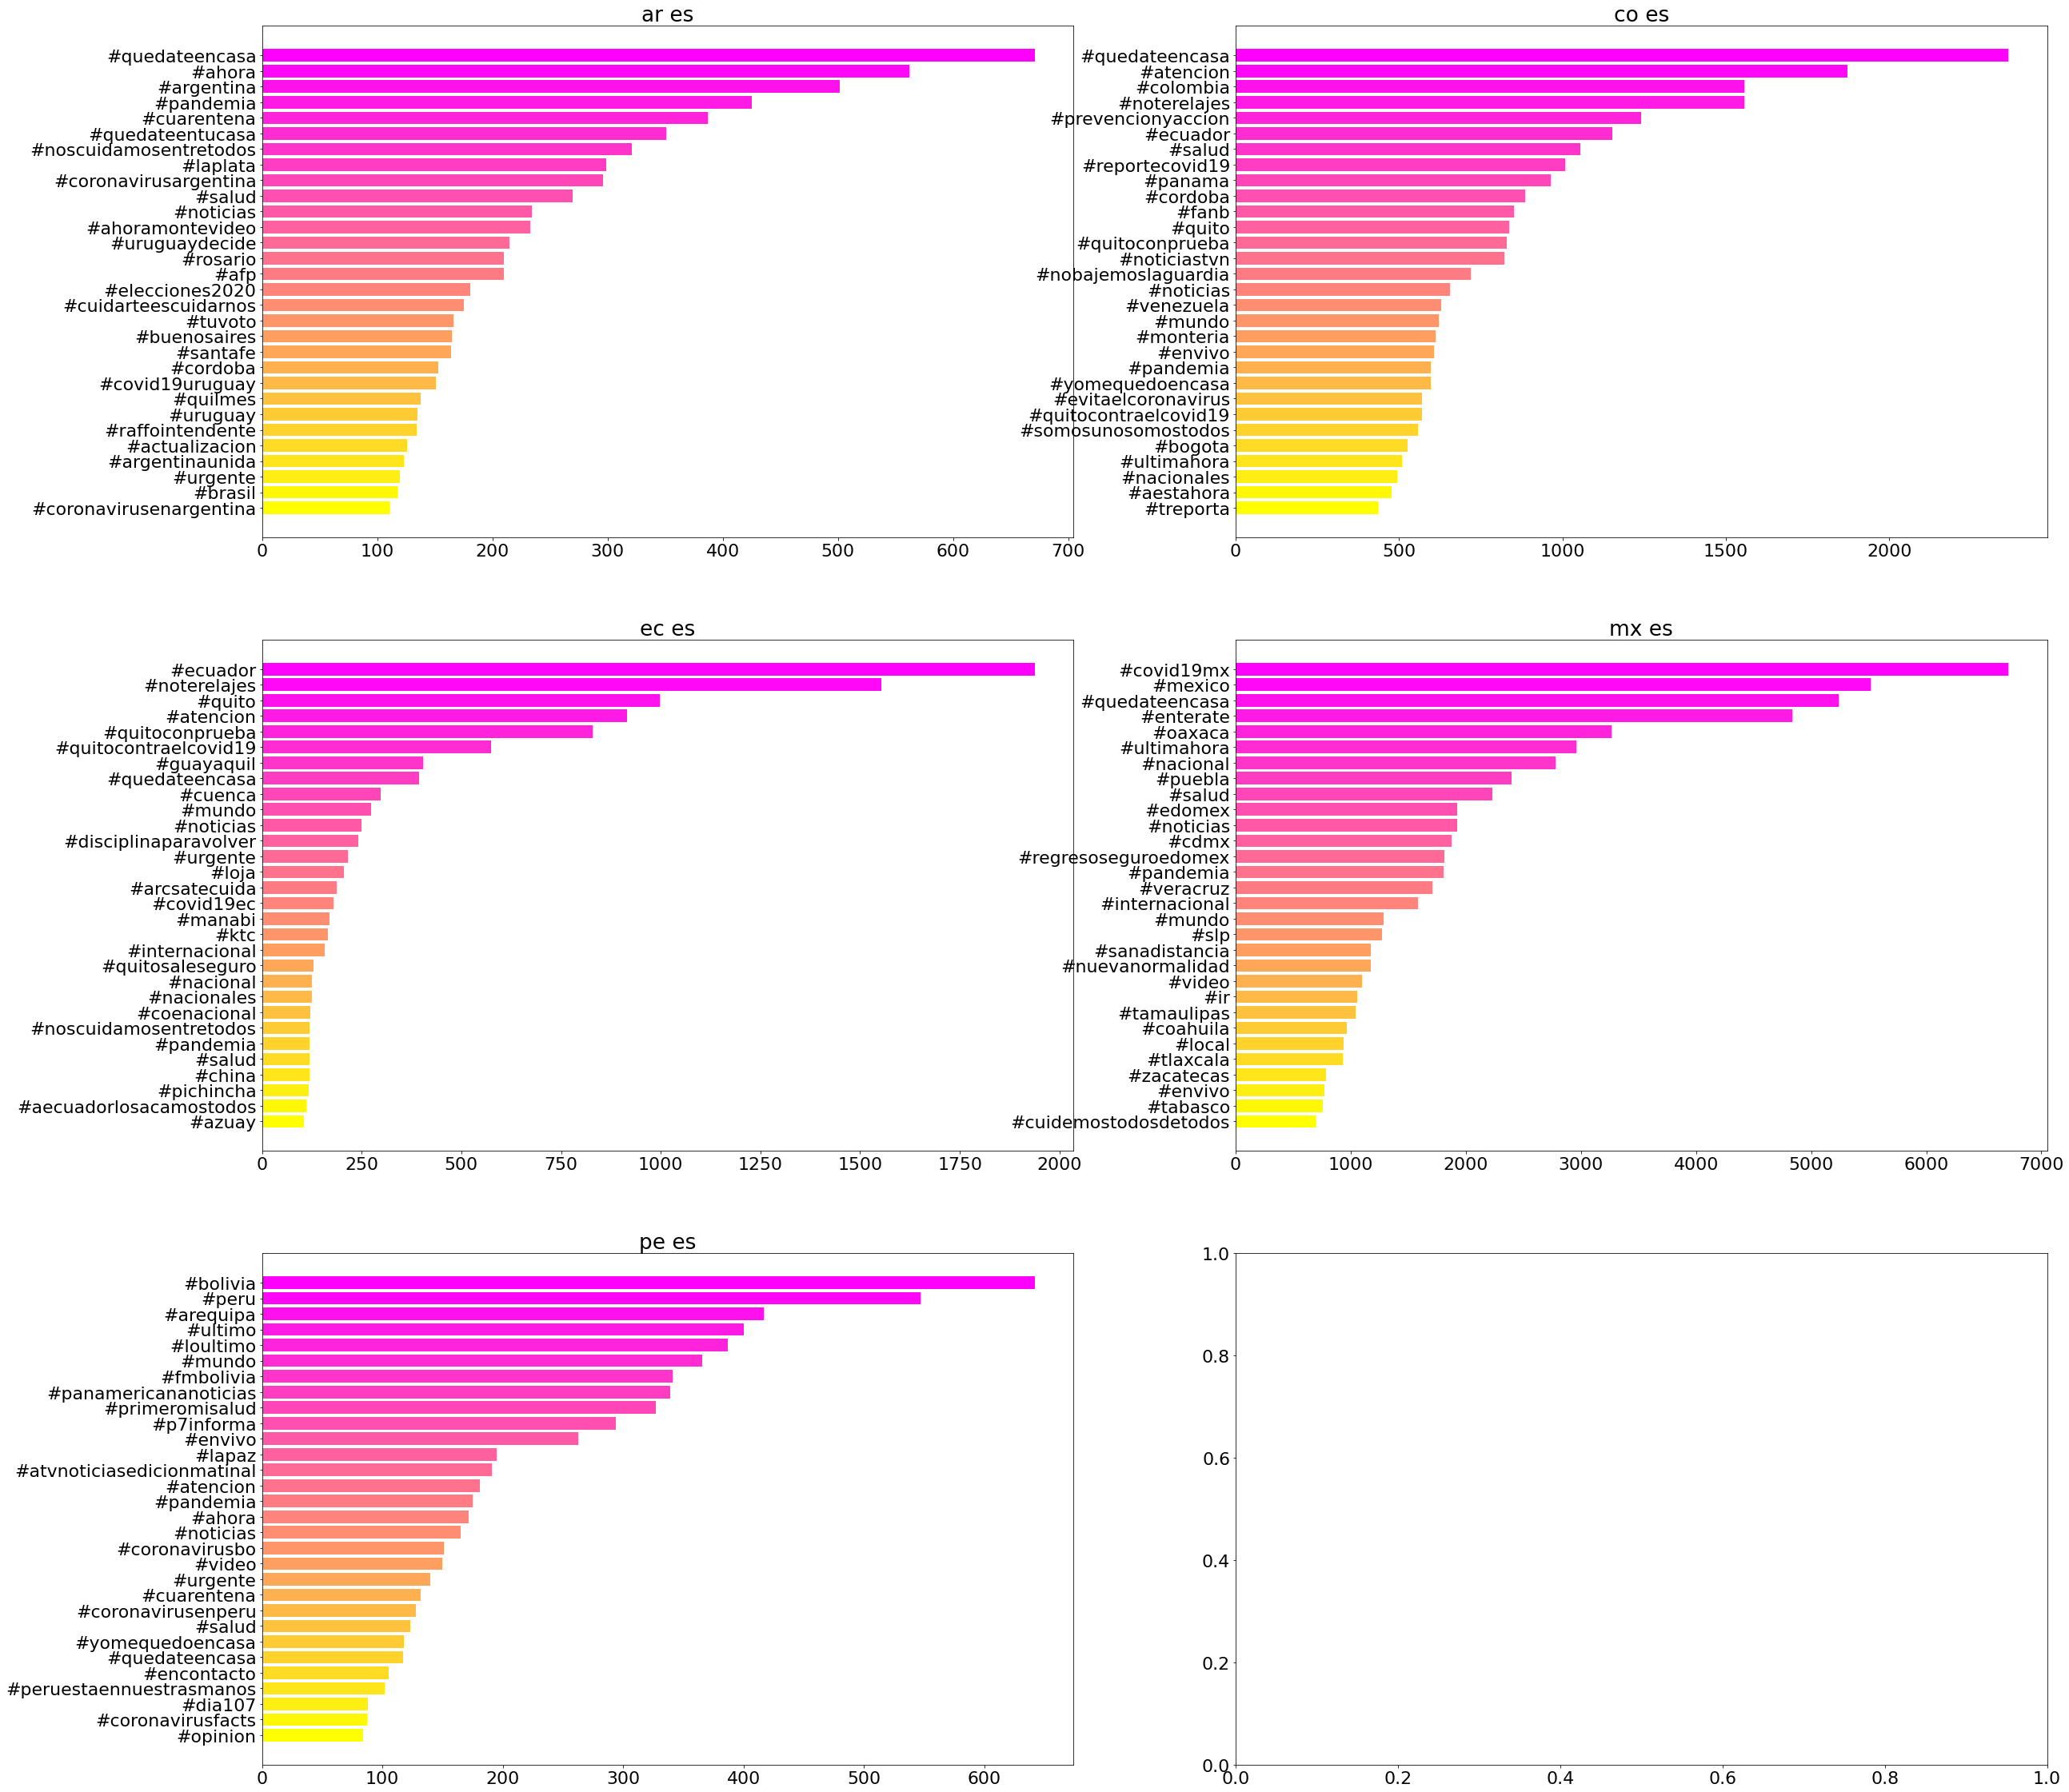

In [163]:
plot_bar_matrix(counts, num_top_words = top_n, num_cols = 2)

## Unique Top Words

In [164]:
col_name = "text"

In [165]:
df = df.dropna(subset=[col_name])

In [166]:
grouping = df.groupby(["geo", "lang"])[col_name]
vocab_dic = uniq_vocab_by_group(grouping)  # unique vocab dictionary 
df[col_name] = df.apply(lambda x : set(x[col_name]) & vocab_dic[(x['geo'], x['lang'])],
                        result_type='reduce', axis=1)  # filtering tweets by that dic

In [167]:
counts = {k: Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n) for k, t in grouping}

In [168]:
pprint(counts)

{('ar', 'es'): [(('lanus',), 141),
                (('olavarria',), 131),
                (('artigas',), 129),
                (('sinae',), 107),
                (('conurbano',), 97),
                (('zavalla',), 94),
                (('gualeguaychu',), 88),
                (('otamendi',), 87),
                (('paysandu',), 71),
                (('chilecito',), 65),
                (('pehuajo',), 64),
                (('bombal',), 57),
                (('berisso',), 56),
                (('conicet',), 53),
                (('santafesino',), 52),
                (('tacuarembo',), 51),
                (('francese',), 48),
                (('cañuelas',), 46),
                (('casilda',), 45),
                (('tandil',), 44),
                (('runners',), 42),
                (('villaguay',), 42),
                (('oncativo',), 41),
                (('casmu',), 40),
                (('chascomus',), 38),
                (('asse',), 38),
                (('ezeiza',), 38),
         

In [ ]:
plot_bar_matrix(counts, num_top_words = 30, num_cols = 2)

3. collectively (ar, ec, co, pe, mx) weekly corpus without stop words, top 10 words, top 5 hashtags, top 10 unique words, and their visualizations >>> SAT: Could Jerry run a script to get weekly results or do we need to do it by hand?
4. each country's (ar, ec, co, pe, mx individually) monthly and entire corpus without stop words, top 20 words, top 10 hashtags, top 20 unique words by location and by month (if time permits by week would be even better), and their visualizations  >> SAT: I am not sure that we need to do countries individually, the viz we have now offer already this results. And the location is tricky, do you want to locate all tweets?? This would have to be done through the database, and not with @Jerry's scripts. 
5. overview with two months worth of information and see what that gives us >>> SAT: Do you mean to process the two months together? I think it would better to add another month, until July (which I added). 